# **CreditScoreInsight:A Credit Score Classification Model**

**1.INTRODUCTION**

**Problem Statement**

In your role as a data scientist within a global finance corporation, you're tasked with a significant
undertaking. Over the years, the company has amassed a substantial dataset comprising essential
banking details and an extensive repository of credit-related data.
Driven by the need for enhanced efficiency and accuracy, the company's management has initiated
a forward-looking project.

The objective is to develop an intelligent system employing data science
and machine learning to automate the categorization of individuals into specific credit score
brackets.
o create a predictive model that categorizes customers
into three creditworthiness levels: Good, Standard, and Poor. This model will be a valuable tool for
banks and financial institutions to make informed decisions about loan approvals and risk
assessment.

**2.DATA PREPARATION**

**2.1 Import Libraries**

In [110]:
!pip install mlflow # Packages for EDA

In [91]:
# Packages for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from scipy.stats import skew
from scipy.stats import f_oneway
# Packages for Preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
#Packages for  Modeling and evaluation
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix,classification_report,roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,
import lightgbm as lgb

#To ignore future warnings
import warnings
warnings.filterwarnings("ignore", message="Setuptools is replacing distutils")
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

**2.2 Loading Files**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
#Load the data into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/credit.csv')

In [51]:
data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


**2.3 Data Profiling**

Dataset Description

This dataset contains information on 100,000 customers' financial and credit activities. It includes 28 attributes .

a.Columns

ID: Unique record identifier.

Customer_ID: Unique identifier for each customer.

Month: Reporting month.

Name: Customer's name.

Age: Customer's age.

SSN: Customer's Social Security Number.

Occupation: Customer's occupation.

Annual_Income: Yearly income.

Monthly_Inhand_Salary: Monthly take-home salary.

Num_Bank_Accounts: Number of bank accounts.

Num_Credit_Card: Number of credit cards.

Interest_Rate: Applicable interest rate.

Num_of_Loan: Number of loans.

Type_of_Loan: Types of loans held.

Delay_from_due_date: Average days payments are delayed.

Num_of_Delayed_Payment: Count of delayed payments.

Changed_Credit_Limit: Change in credit limit.

Num_Credit_Inquiries: Number of credit inquiries.

Credit_Mix: Variety of credit accounts.

Outstanding_Debt: Total debt owed.

Credit_Utilization_Ratio: Ratio of credit used to credit available.

Credit_History_Age: Age of credit history (months).

Payment_of_Min_Amount: Indicates if only minimum payments are made.

Total_EMI_per_month: Total monthly EMI payments.

Amount_invested_monthly: Monthly investments.

Payment_Behaviour: Spending and payment patterns.

Monthly_Balance: End-of-month balance.

Credit_Score: Credit score category (Good, Standard, Poor).

b.Types of column

ID,Customer_ID, 'SSN','Name' -These are unique identifiers.

Discrete Columns: These columns represent distinct, countable values.
'ID', 'Customer_ID', 'Month'

Continuous Columns: These columns represent measurable quantities and can take on any value within a range.
'Age', 'SSN', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'

Categorical Columns: These columns represent categories or groups and are typically non-numeric.
Name, Occupation, Type_of_Loan, Credit_Mix, Payment_of_Min_Amount, Payment_Behaviour, Credit_Score,

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

**3.EDA**

In [ ]:
data.describe()# Summary statistics

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [ ]:
data.describe(include='object')

,Name,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,100000,100000,100000,100000,100000,100000,100000
unique,10128,15,6261,3,3,6,3
top,Jessicad,Lawyer,No Data,Standard,Yes,Low_spent_Small_value_payments,Standard
freq,48,7096,11408,45848,52326,28616,53174


**3.1 Univariate Analysis**

**Target column**

In [ ]:
# Define color mapping for Credit Score categories
palette= {'Poor': 'red', 'Standard': 'yellow', 'Good': 'green'}

Value counts of Credit Score:
Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64


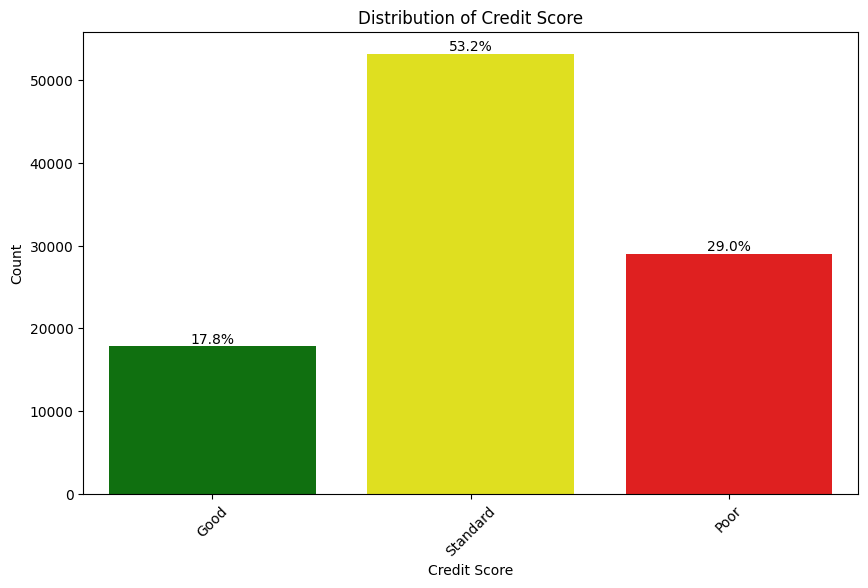

In [ ]:
# Map colors to a new column in the data
data['Color'] = data['Credit_Score'].map(palette)

# Display the unique values and their counts in the target column
print("Value counts of Credit Score:")
print(data['Credit_Score'].value_counts())

# 1. Distribution of the Target Column
plt.figure(figsize=(10, 6))

# Calculate value counts and percentages
value_counts = data['Credit_Score'].value_counts()
total = len(data)
percentages = value_counts / total * 100

# Plot using seaborn
ax = sns.countplot(x='Credit_Score', data=data, palette=palette, hue='Credit_Score', legend=False)

# Annotate with percentages
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    percent = height / total * 100
    ax.annotate(f'{percent:.1f}%', (x + width / 2, height), ha='center', va='bottom')

plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Categorical columns**

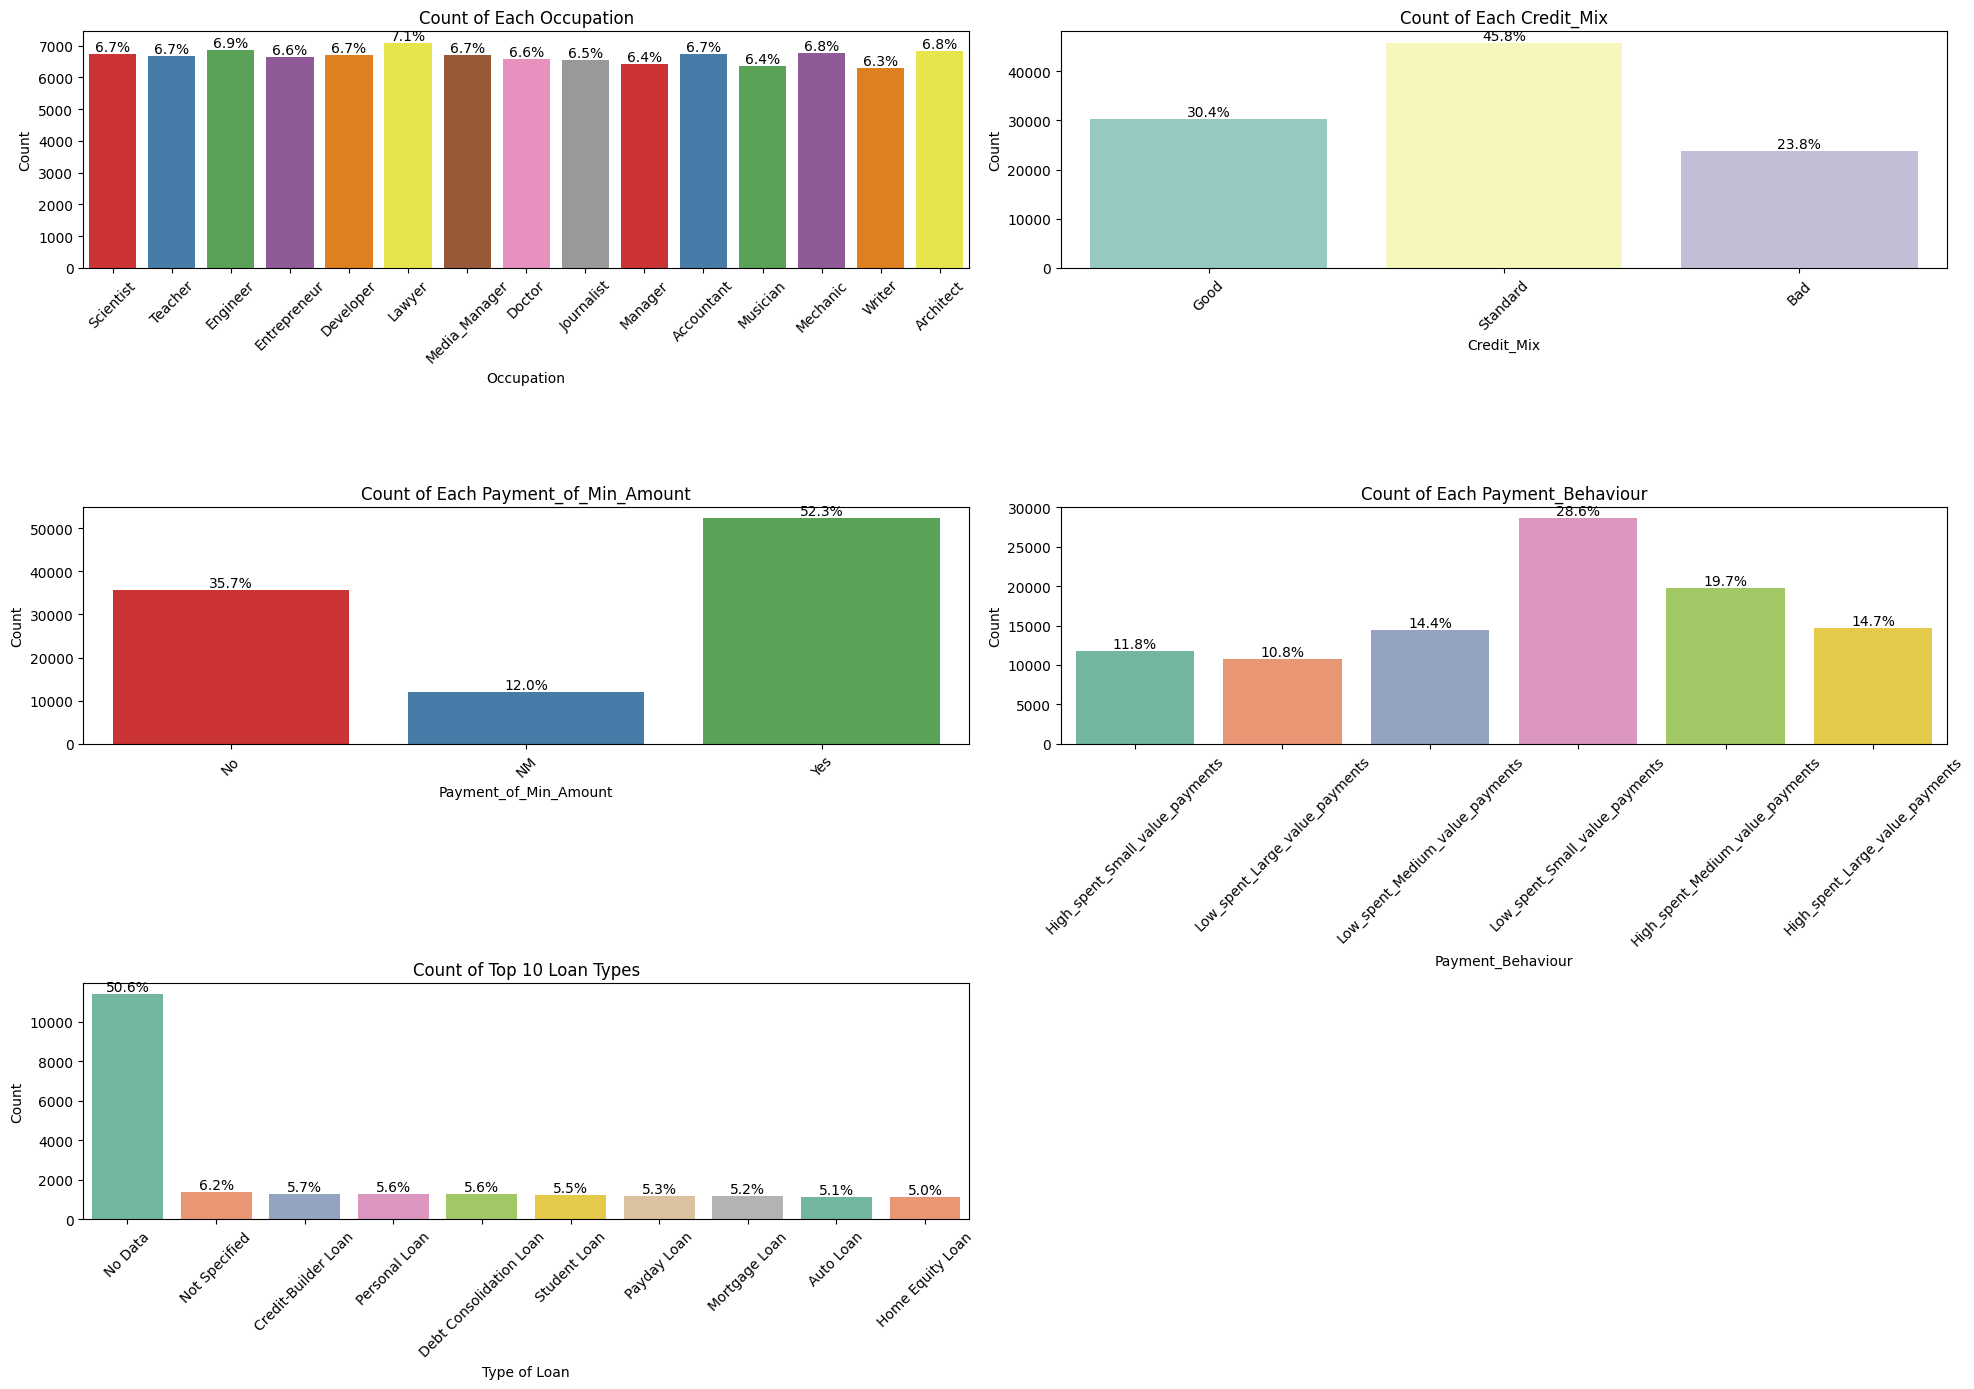

In [ ]:
# Define figure size for all plots
figsize = (20, 14)

# List of columns and palettes
columns = [
    ('Occupation', 'Set1'),
    ('Credit_Mix', 'Set3'),
    ('Payment_of_Min_Amount', 'Set1'),
    ('Payment_Behaviour', 'Set2')
]

# Create subplots
plt.figure(figsize=figsize)

for idx, (column, palette) in enumerate(columns, start=1):
    plt.subplot(3, 2, idx)
    ax = sns.countplot(x=column, data=data, palette=palette, dodge=False)

    # Calculate and annotate percentages
    total = len(data)
    for p in ax.patches:
        height = p.get_height()
        width = p.get_width()
        x = p.get_x()
        percent = height / total * 100
        ax.annotate(f'{percent:.1f}%', (x + width / 2, height), ha='center', va='bottom')

    plt.title(f'Count of Each {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

# Calculate value counts for Type_of_Loan and get the top 10
type_of_loan_counts = data['Type_of_Loan'].value_counts().nlargest(10)

# Filter the dataset to include only the top 10 loan types
top_10_loans = type_of_loan_counts.index
filtered_data = data[data['Type_of_Loan'].isin(top_10_loans)]

# Plot count of top 10 loan types
plt.subplot(3, 2, 5)
ax = sns.countplot(x='Type_of_Loan', data=filtered_data, palette='Set2', order=top_10_loans)

# Calculate and annotate percentages
total = len(filtered_data)
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    percent = height / total * 100
    ax.annotate(f'{percent:.1f}%', (x + width / 2, height), ha='center', va='bottom')

plt.title('Count of Top 10 Loan Types')
plt.xlabel('Type of Loan')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Adjust layout and display all plots
plt.tight_layout()
plt.show()

Although minor variations,all occupations have a similar count ,indicating a balanced dataset in terms of occupation distribution.

Credit mix, categorized as Bad, Good, or Standard. The 'Standard' category has the highest count, followed by 'Good' and 'Bad'.

Third chart shows how many individuals pay the minimum amount required. The categories are NM (Not Mentioned), No, and Yes. Most individuals either do not pay the minimum amount or do pay it, with a smaller number of individuals falling into the NM category.

Fourth chart shows the distribution of individuals based on their payment behavior. The behaviors are categorized based on spending and payment patterns. The 'Low_spent_Small_value_payments' category has the highest count, while the 'High_spent_Small_value_payments' has the lowest.

Fifth chart has 6261 unique values.It highlights that a significant portion of the data lacks specific loan type information, either labeled as "No Data" or "Not Specified." Among the specified loan types, none stand out with particularly high counts, suggesting a relatively even distribution among the different types listed

**Other Numerical columns**

Skewness of Month: 0.00


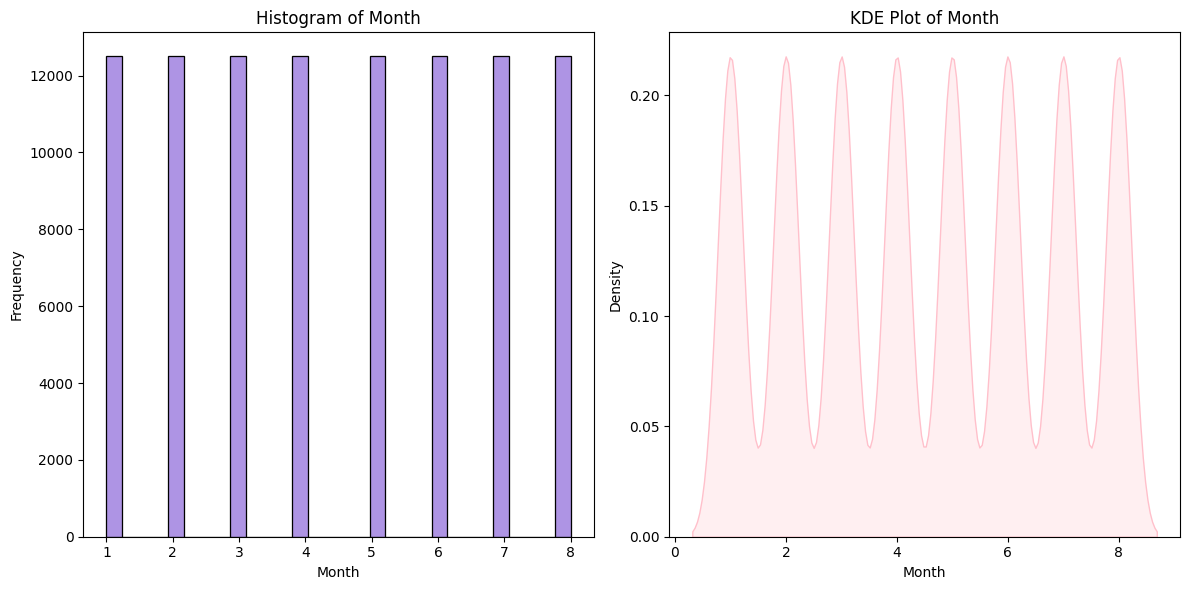

Skewness of Age: 0.16


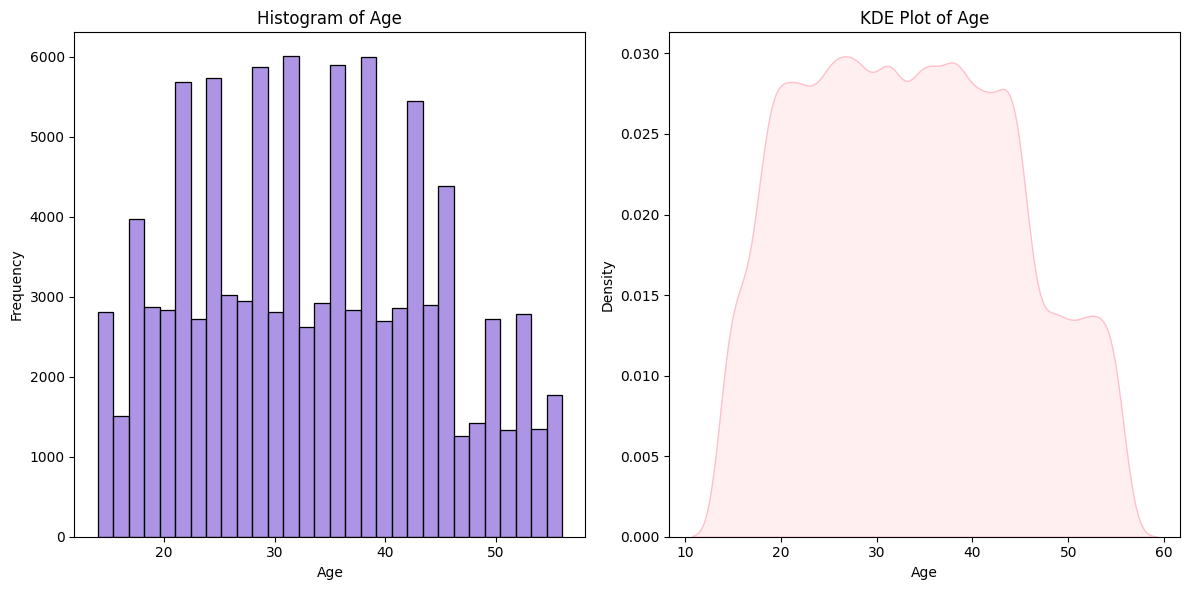

Skewness of Num_Bank_Accounts: -0.19


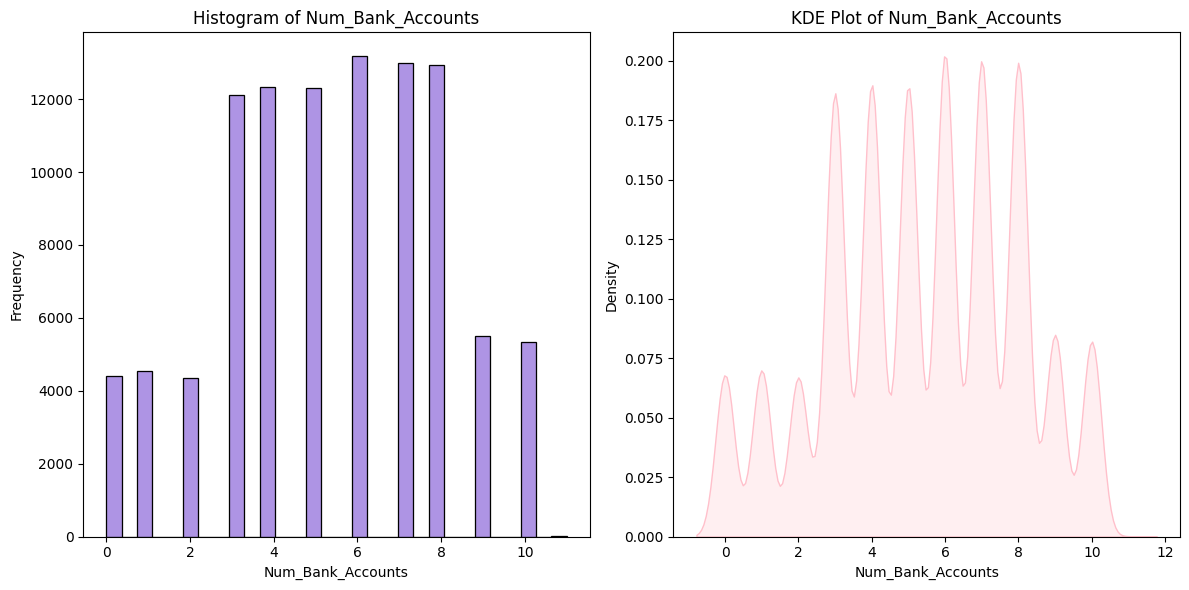

Skewness of Num_Credit_Card: 0.23


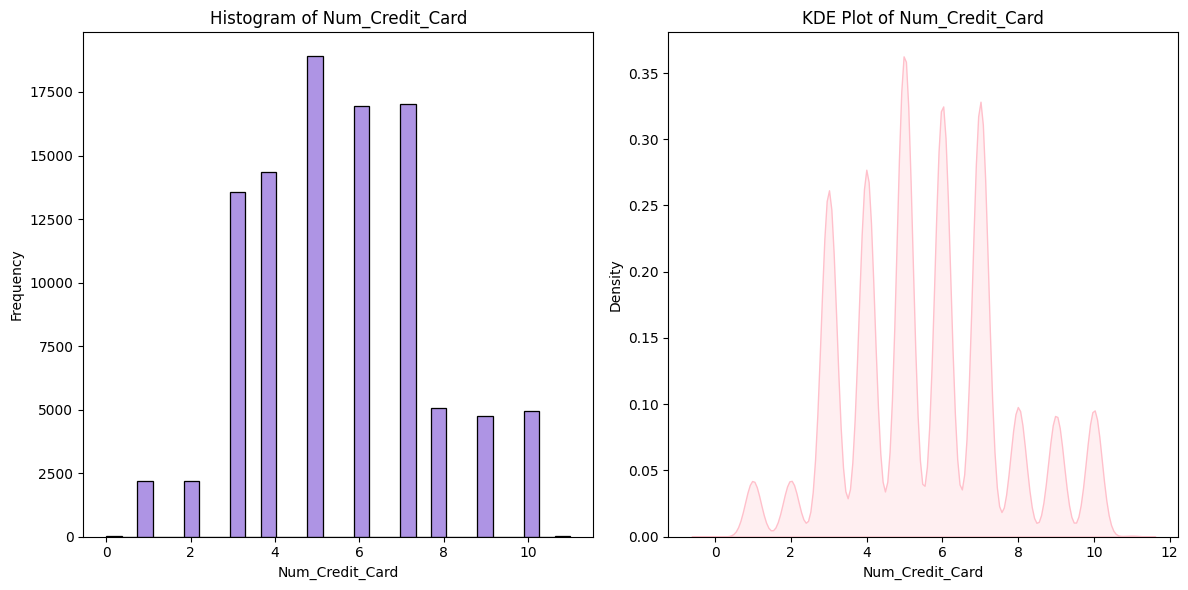

Skewness of Interest_Rate: 0.50


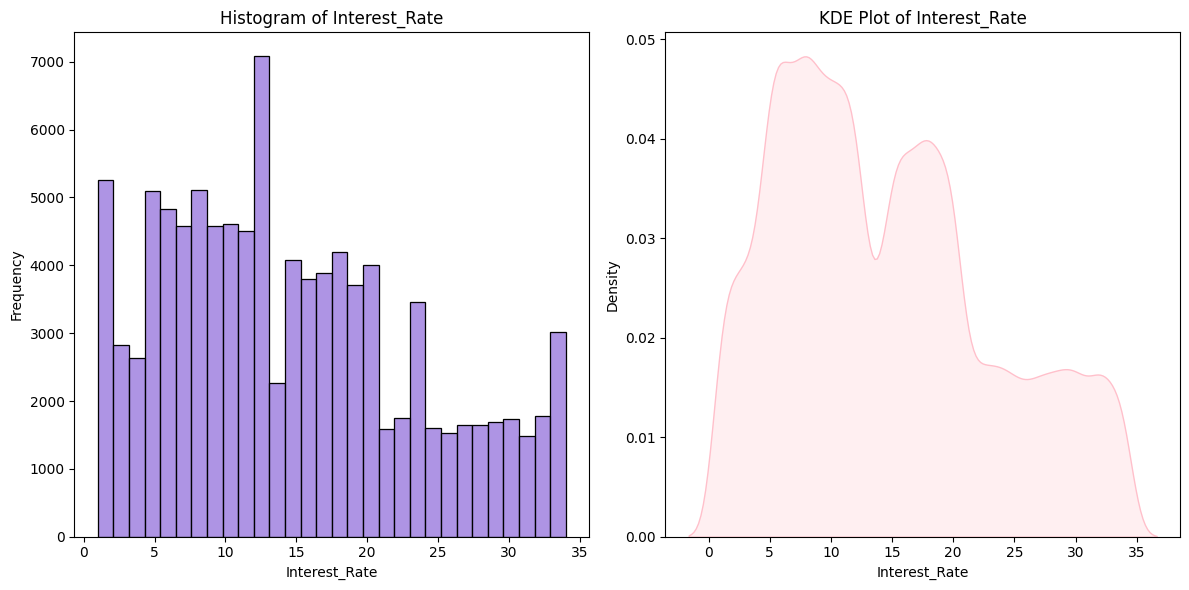

Skewness of Num_of_Loan: 0.45


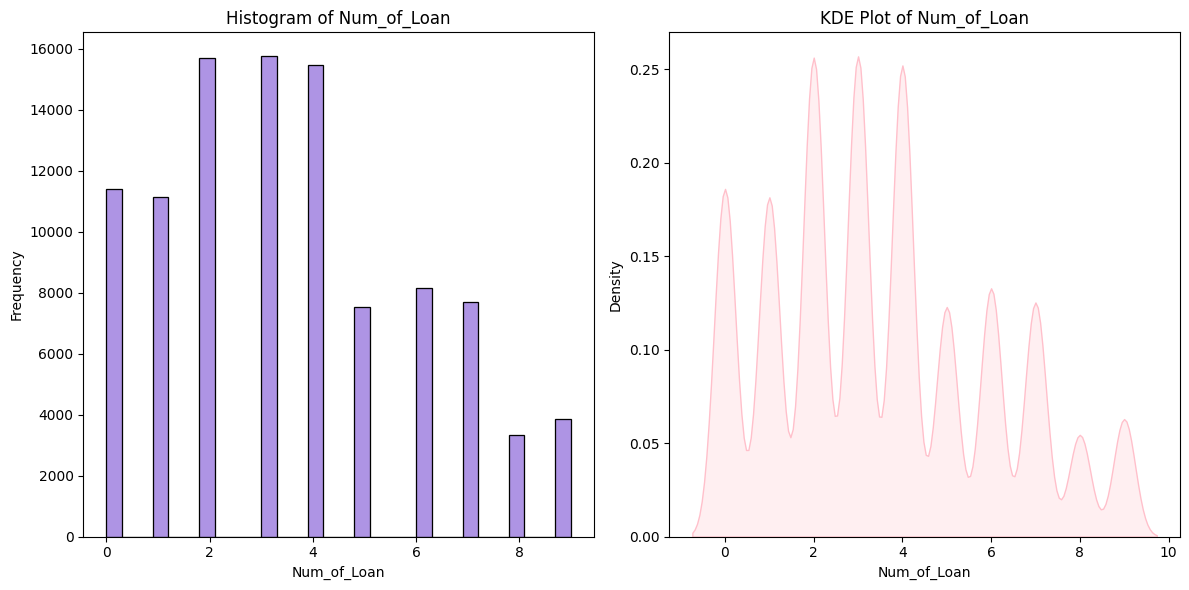

Skewness of Delay_from_due_date: 0.97


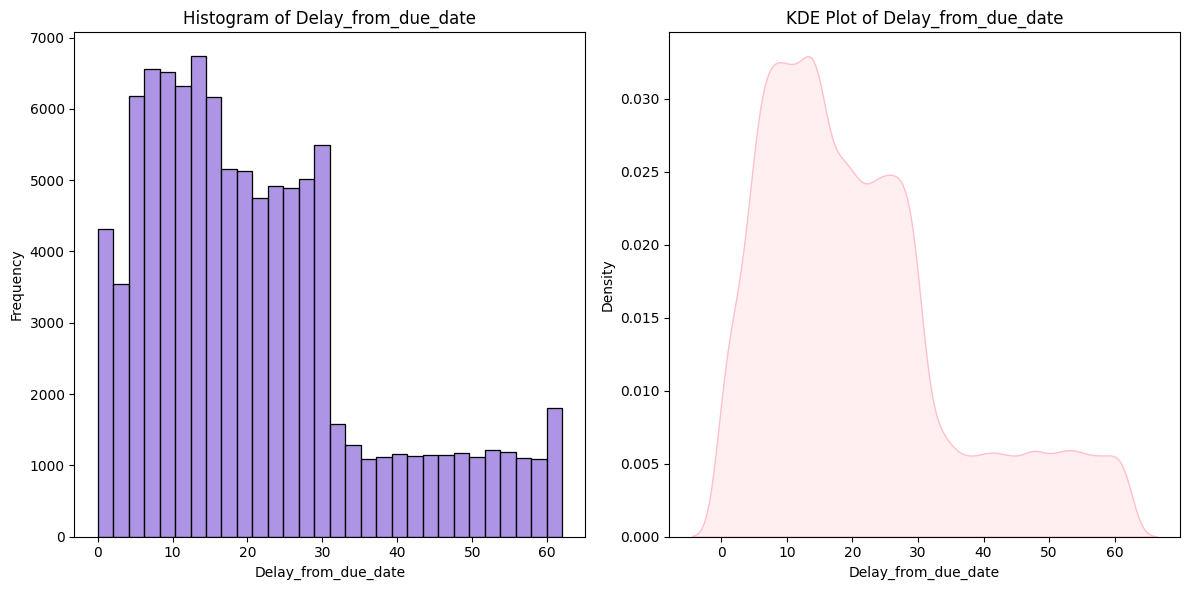

Skewness of Num_of_Delayed_Payment: -0.21


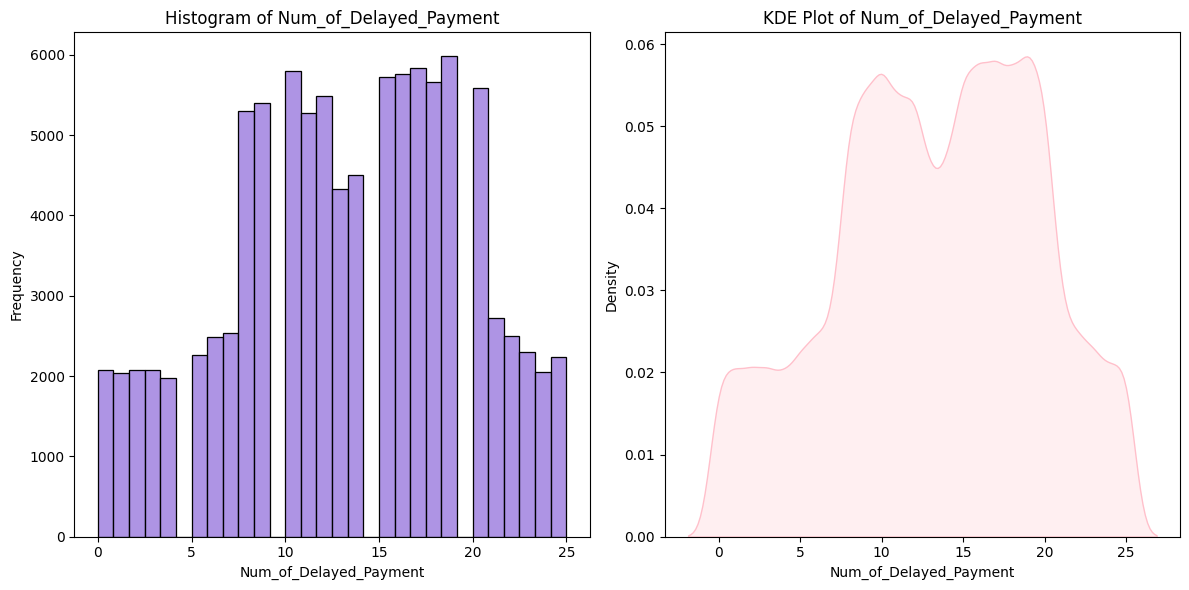

Skewness of Changed_Credit_Limit: 0.71


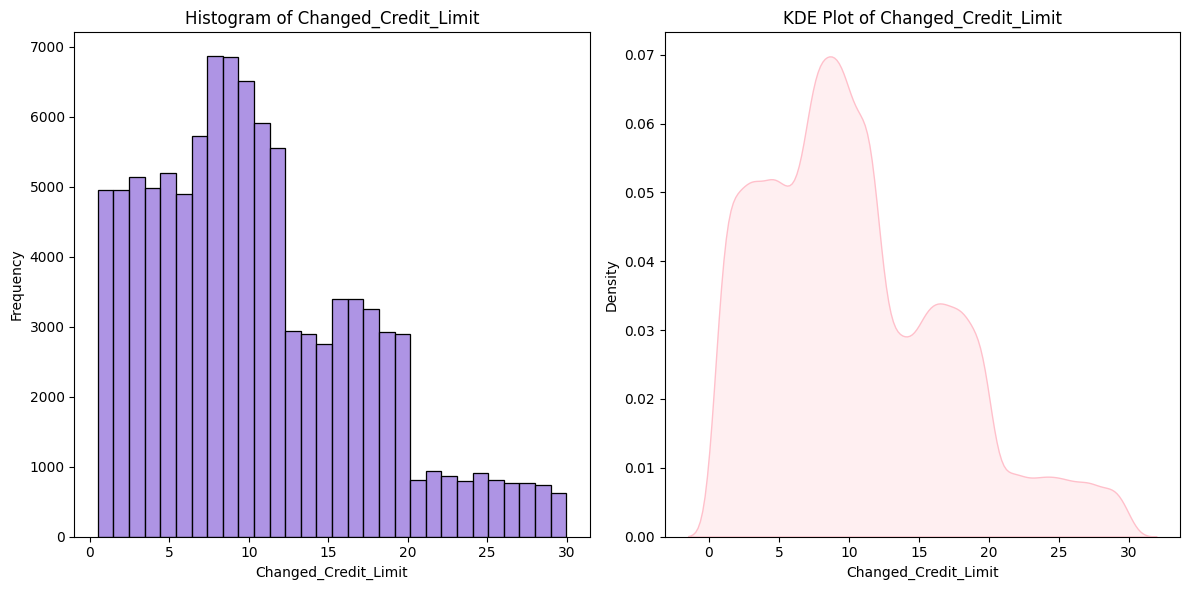

Skewness of Num_Credit_Inquiries: 0.41


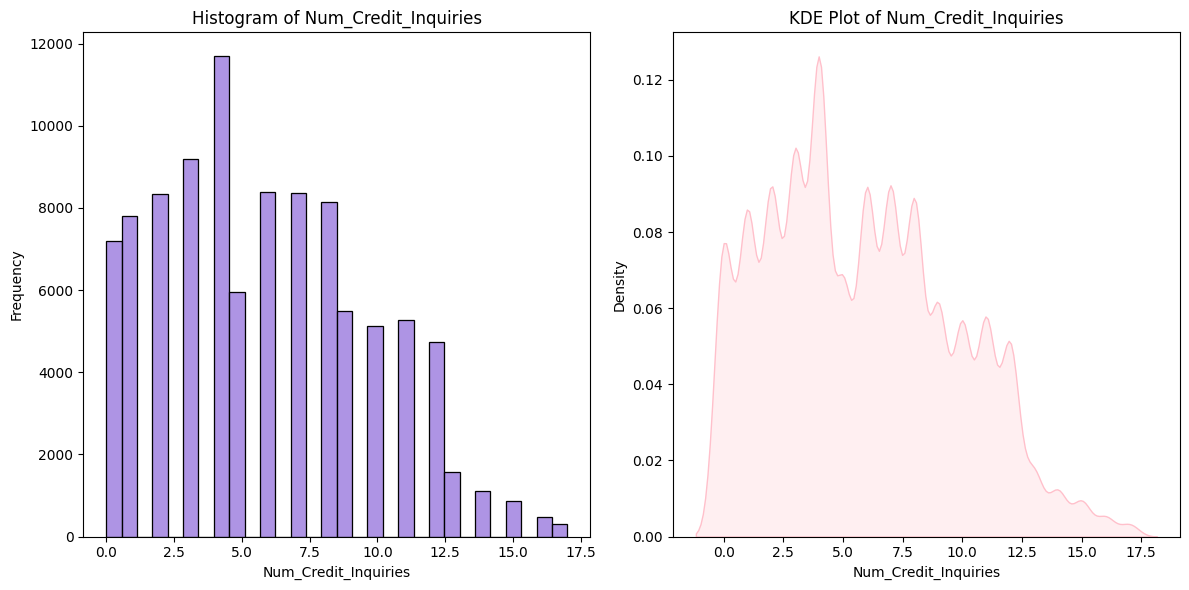

Skewness of Credit_History_Age: -0.05


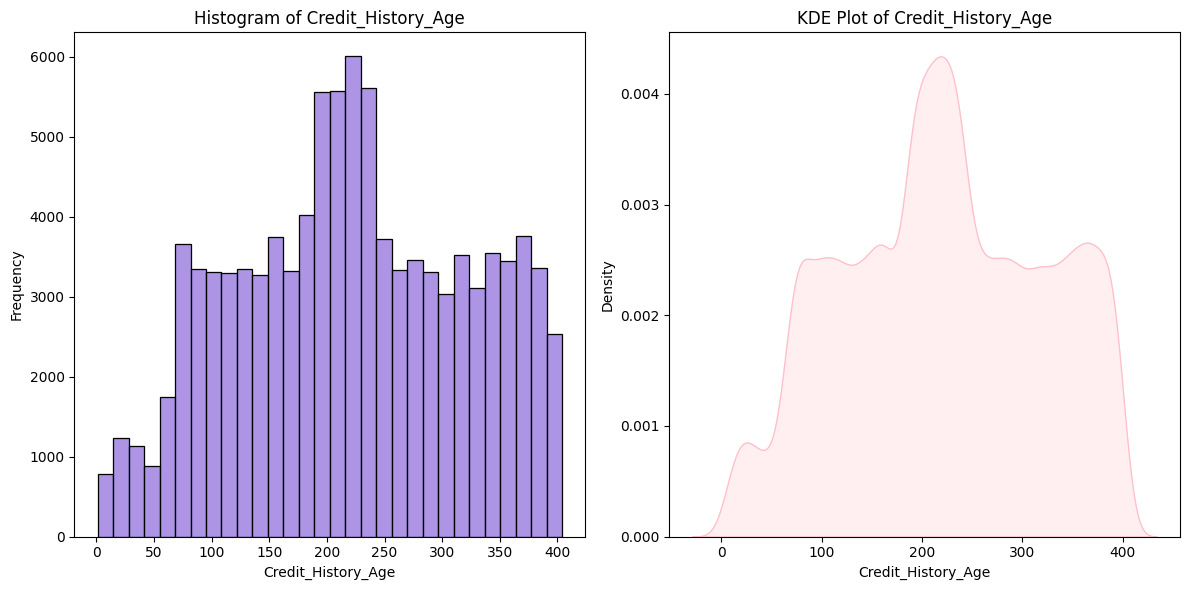

Skewness of Annual_Income: 1.13


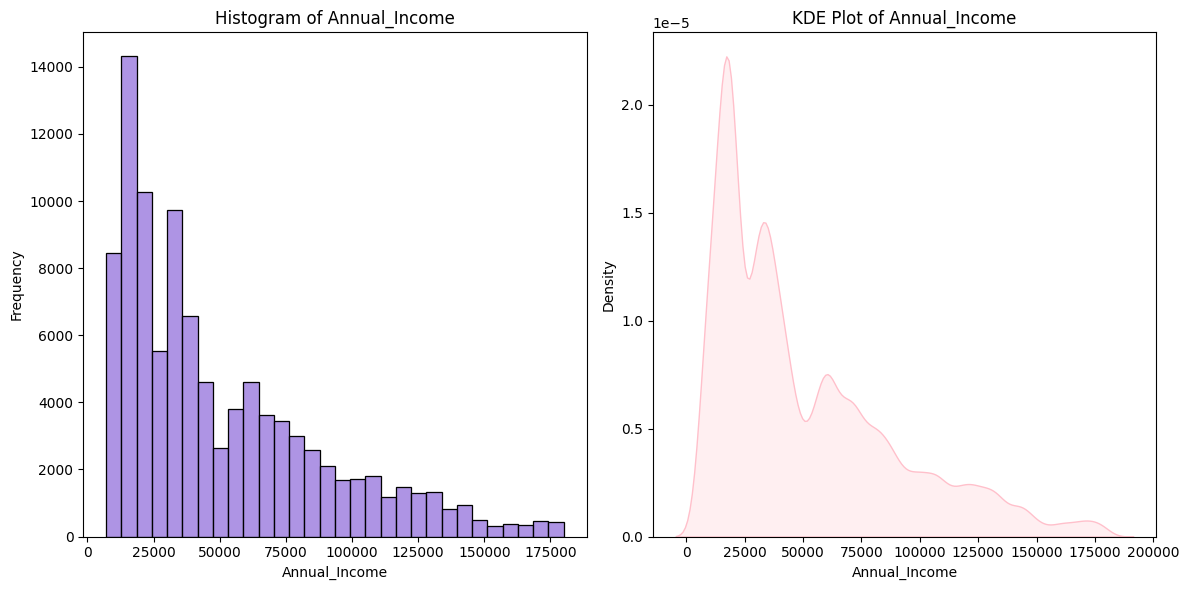

Skewness of Monthly_Inhand_Salary: 1.13


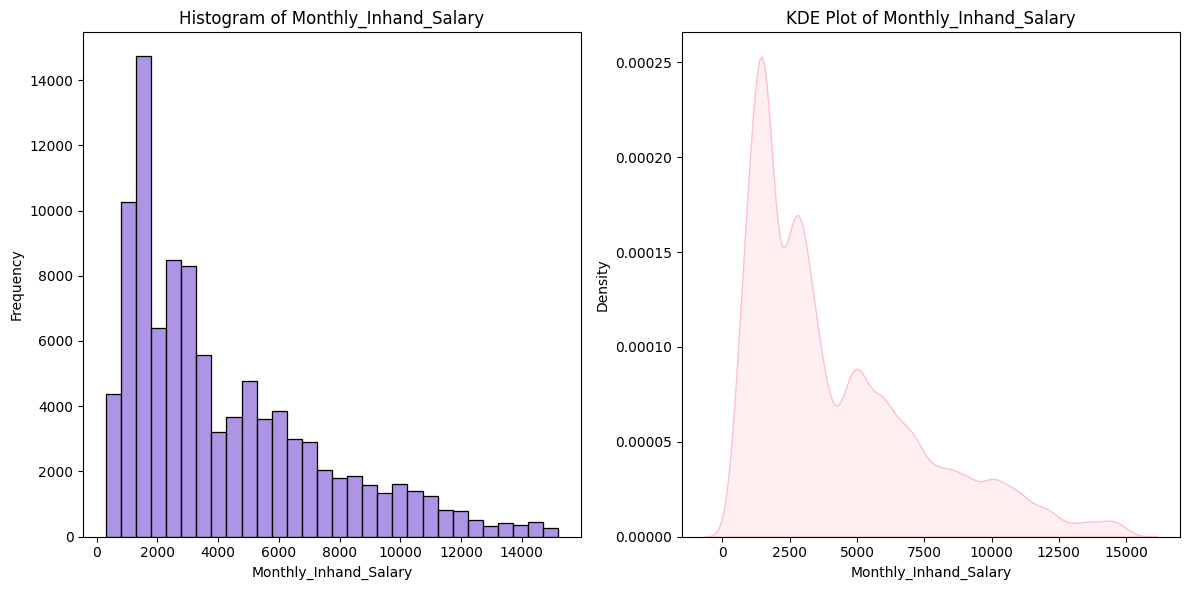

Skewness of Outstanding_Debt: 1.21


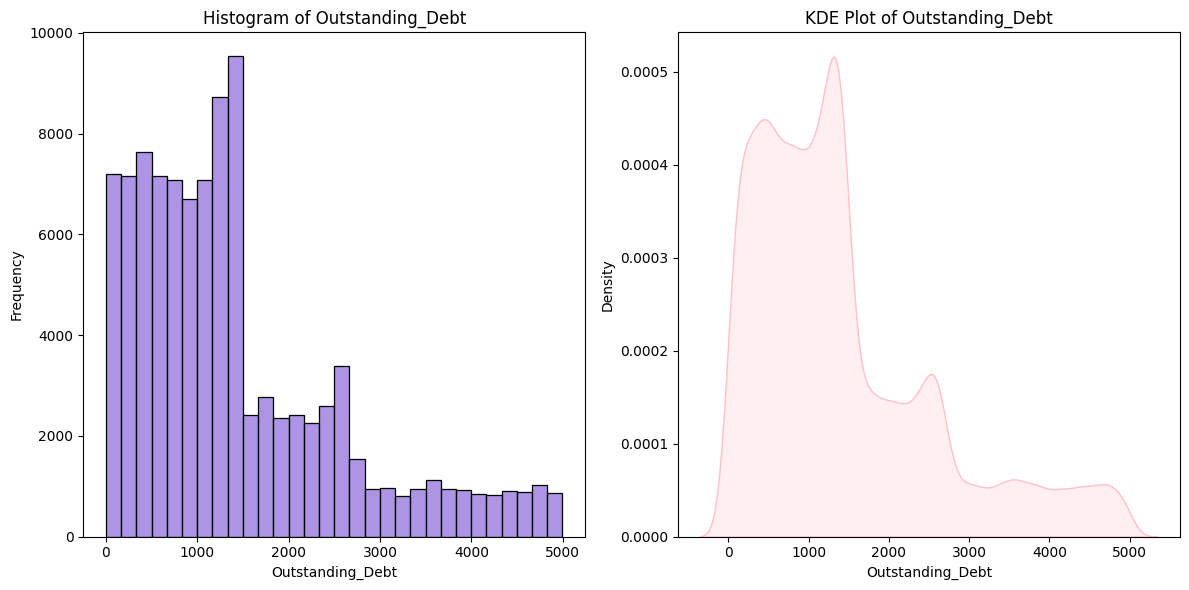

Skewness of Credit_Utilization_Ratio: 0.03


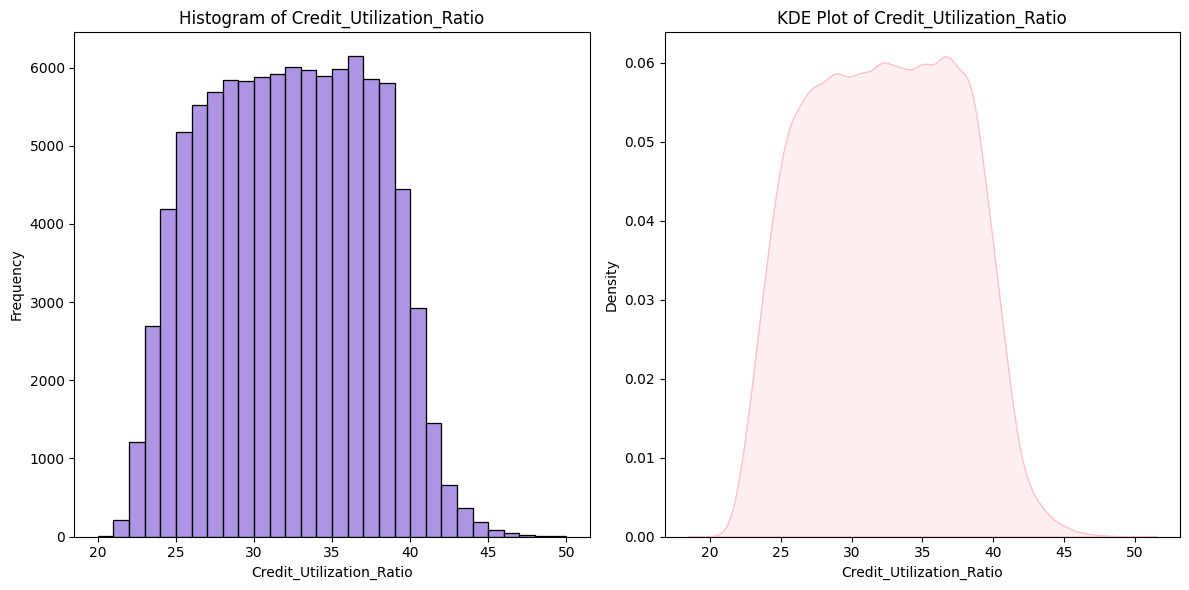

Skewness of Total_EMI_per_month: 4.04


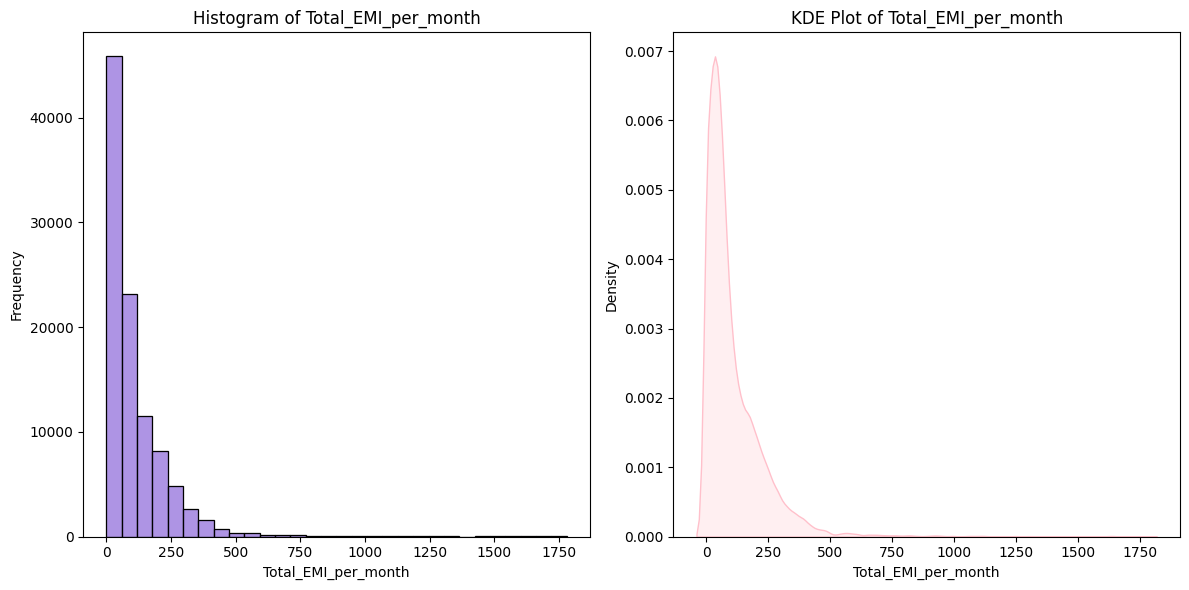

Skewness of Amount_invested_monthly: 1.76


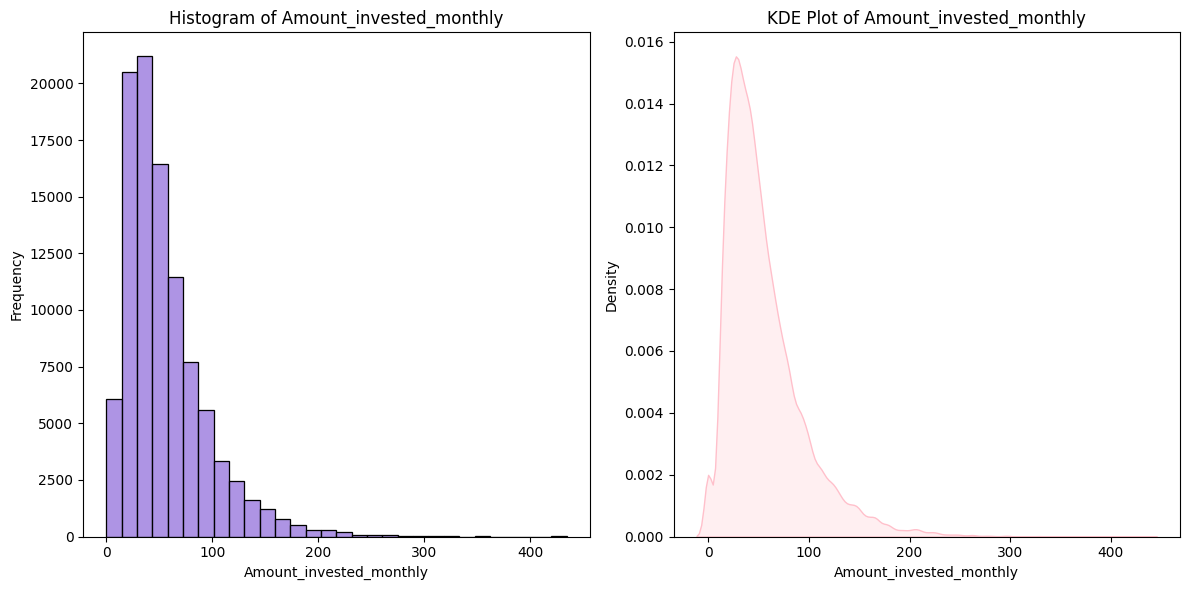

Skewness of Monthly_Balance: 1.36


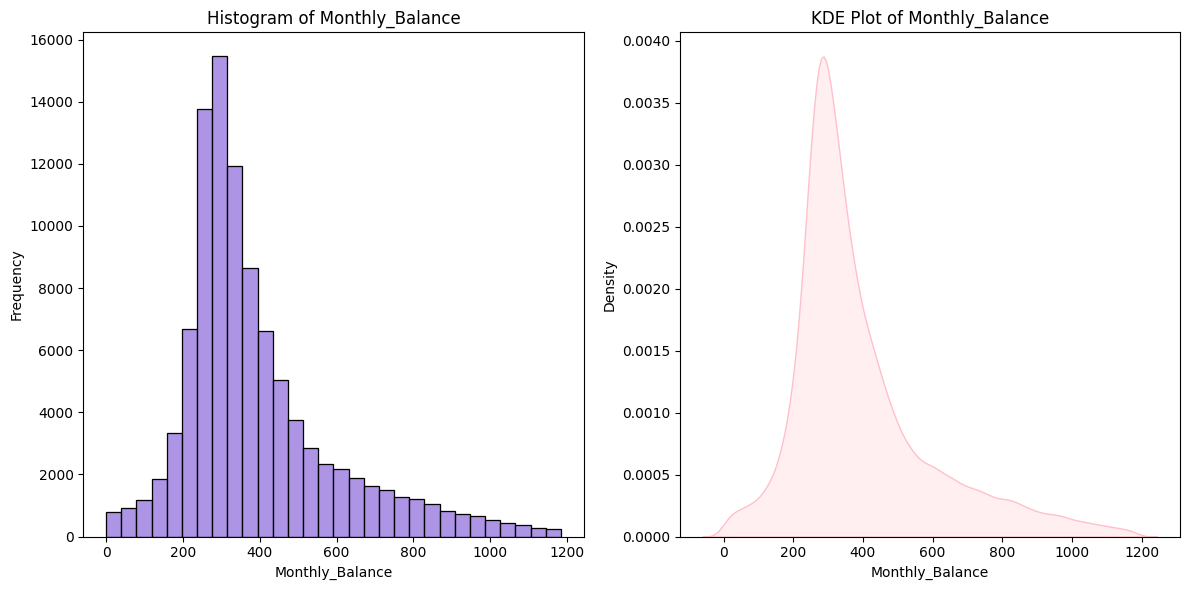

In [ ]:
# List of numerical columns
numerical_columns = [
    'Month', 'Age', 'Num_Bank_Accounts', 'Num_Credit_Card',
    'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
    'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
    'Num_Credit_Inquiries', 'Credit_History_Age',
    'Annual_Income', 'Monthly_Inhand_Salary',
    'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
    'Amount_invested_monthly', 'Monthly_Balance'
]

# Plot histograms, KDE plots, and display skewness
for col in numerical_columns:
    plt.figure(figsize=(12, 6))

    # Calculate skewness
    col_skewness = skew(data[col].dropna())  # Drop NaNs for skewness calculation

    # Print skewness
    print(f'Skewness of {col}: {col_skewness:.2f}')

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=False, bins=30, color='mediumpurple')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # KDE Plot
    plt.subplot(1, 2, 2)
    sns.kdeplot(data[col], fill=True, color='pink')
    plt.title(f'KDE Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()


*   Month and Age: Approximately symmetric distributions
*   Interest_Rate, Num_of_Loan, Delay_from_due_date, Changed_Credit_Limit, Num_Credit_Inquiries, Annual_Income, Monthly_Inhand_Salary, Credit_Utilization_Ratio: These indicate some right tail (Moderate positive skew).
*  Outstanding_Debt (1.25), Total_EMI_per_month (4.04), Amount_invested_monthly (1.75), Monthly_Balance (1.33): Suggests significant right skew.
*   Num_Bank_Accounts and Num_of_Delayed_Payment: These indicate a left tail(negative skewness)






**3.2 Bivariate Analysis**

**Basic Information vs Credit score**

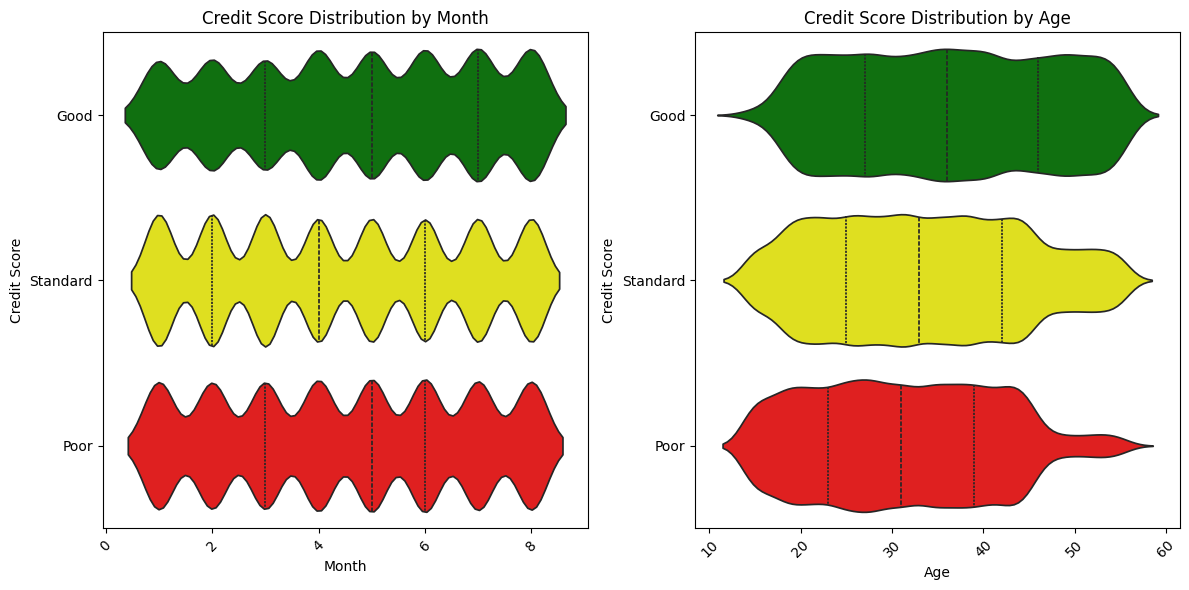

In [ ]:
# Define color mapping for Credit Score categories
palette= {'Poor': 'red', 'Standard': 'yellow', 'Good': 'green'}
# List of plots to create
plot_info = [
    ('Month', 'Credit Score Distribution by Month'),
    ('Age', 'Credit Score Distribution by Age')
]

# Create a combined figure with side-by-side subplots
plt.figure(figsize=(12, 6))

# Loop through the plot information using enumerate
for idx, (x_var, title) in enumerate(plot_info):
    plt.subplot(1, 2, idx + 1)  # 1 row, 2 columns, idx+1 subplot
    sns.violinplot(x=x_var, y='Credit_Score', data=data, inner='quartile', palette=palette)
    plt.title(title)
    plt.xlabel(x_var)
    plt.ylabel('Credit Score')
    plt.xticks(rotation=45)

# Adjust layout and display
plt.tight_layout()
plt.show()

* The distribution of good credit scores is relatively consistent across the months. There are slight variations, but no significant peaks or troughs indicating strong seasonality.
* "Good" credit score are spread across different ages, with a noticeable concentration around the 30-40 age range."Poor" credit score are also distributed across different ages but with a slight concentration around the 20-30 age range."Standard" credit score are mostly found in the age range of around 30-40.

**Income and Salary vs credit score**

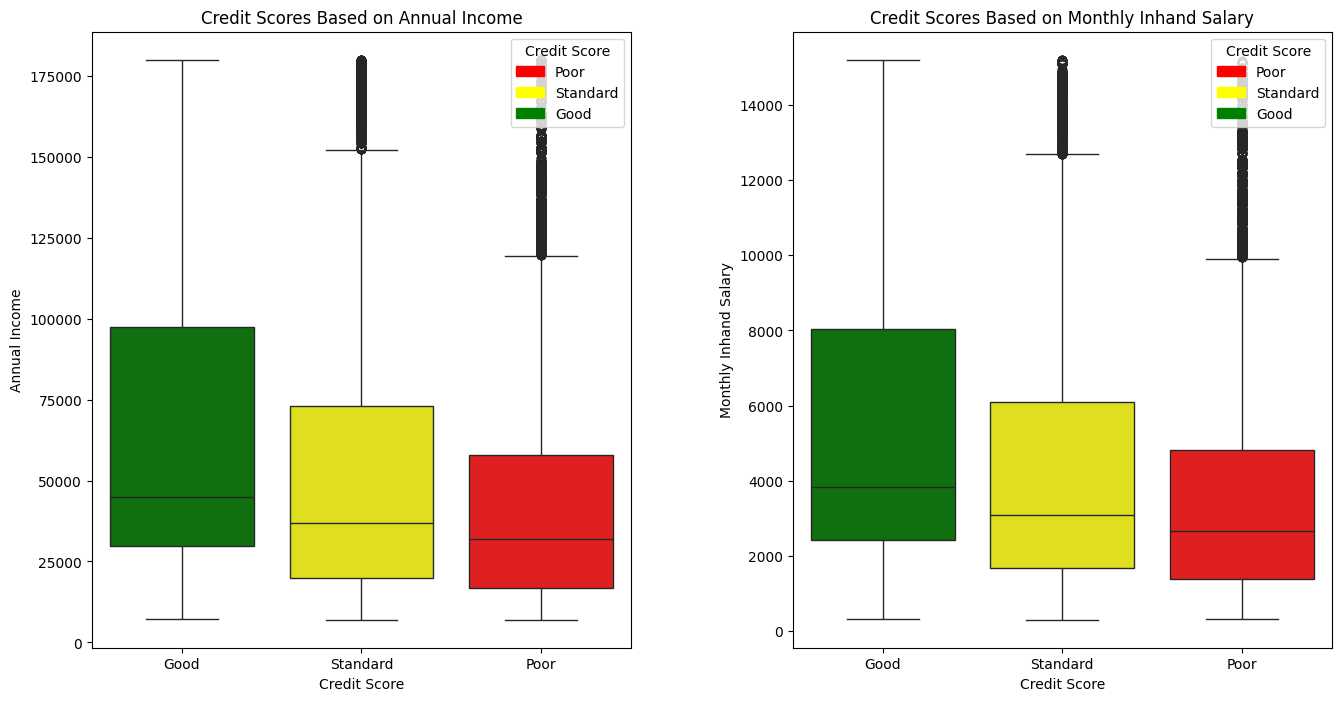

In [ ]:
# Create a figure with a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))  # 1 row, 2 columns
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust space between plots

# Plot 1: Annual Income
sns.boxplot(ax=axes[0], x='Credit_Score', y='Annual_Income', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[0].set_title('Credit Scores Based on Annual Income')
axes[0].set_xlabel('Credit Score')
axes[0].set_ylabel('Annual Income')

# Create legend labels for Annual Income
legend_labels = [mpatches.Patch(color=color, label=score) for score, color in palette.items()]
axes[0].legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Plot 2: Monthly Inhand Salary
sns.boxplot(ax=axes[1], x='Credit_Score', y='Monthly_Inhand_Salary', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[1].set_title('Credit Scores Based on Monthly Inhand Salary')
axes[1].set_xlabel('Credit Score')
axes[1].set_ylabel('Monthly Inhand Salary')

# Create legend labels for Monthly Inhand Salary
axes[1].legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Show the plot
plt.show()

* Annual income and credit scores are directly propotional ,more you earn better the scores.
* Monthly inhand and credit scores are directly propotional ,more you earn better the scores.

**Banking and Accounts vs Credit score**

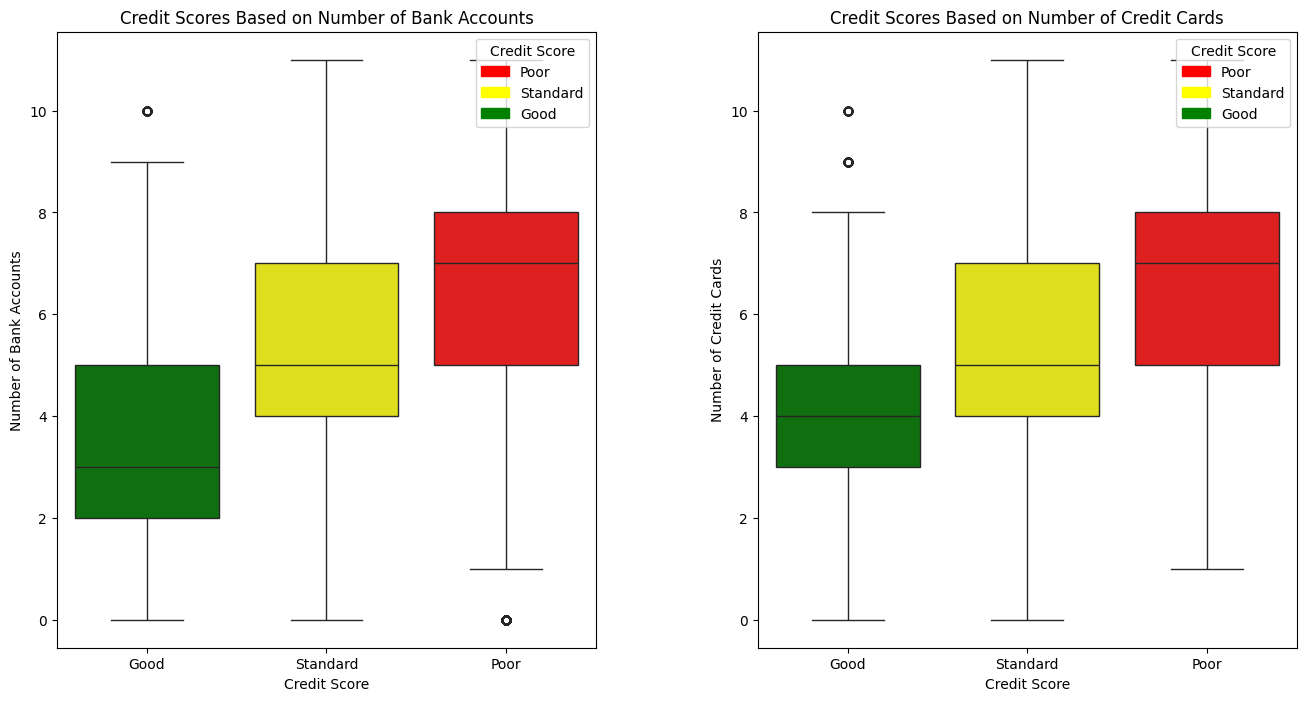

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))  # 1 row, 2 columns
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust space between plots

# Plot 1: Number of Bank Accounts
sns.boxplot(ax=axes[0], x='Credit_Score', y='Num_Bank_Accounts', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[0].set_title('Credit Scores Based on Number of Bank Accounts')
axes[0].set_xlabel('Credit Score')
axes[0].set_ylabel('Number of Bank Accounts')

# Create legend labels for Number of Bank Accounts
legend_labels = [mpatches.Patch(color=color, label=score) for score, color in palette.items()]
axes[0].legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Plot 2: Number of Credit Cards
sns.boxplot(ax=axes[1], x='Credit_Score', y='Num_Credit_Card', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[1].set_title('Credit Scores Based on Number of Credit Cards')
axes[1].set_xlabel('Credit Score')
axes[1].set_ylabel('Number of Credit Cards')

# Create legend labels for Number of Credit Cards
axes[1].legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Show the plot
plt.show()

* Having 2-4 accounts is good enough, but having 5 or more adversly effect credit score.Similar to the number of bank accounts, having more credit cards will not positively impact your credit scores. Having 3 – 5 credit cards is good for your credit score.

**Loans and Payments vs Credit Score**

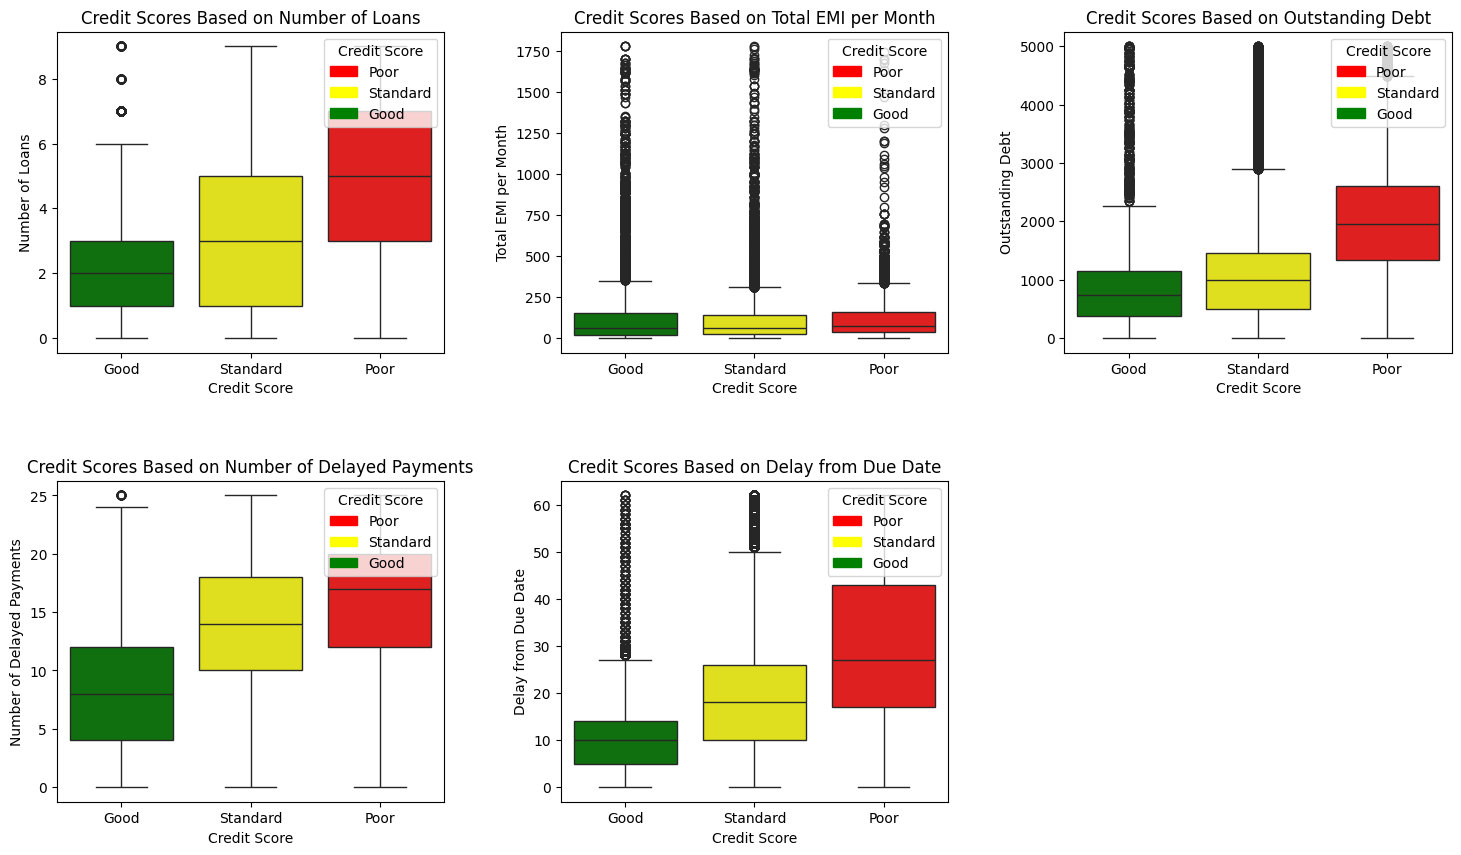

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # 2 rows, 3 columns
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust space between plots

# Plot 1: Number of Loans
sns.boxplot(ax=axes[0, 0], x='Credit_Score', y='Num_of_Loan', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[0, 0].set_title('Credit Scores Based on Number of Loans')
axes[0, 0].set_xlabel('Credit Score')
axes[0, 0].set_ylabel('Number of Loans')

# Create legend labels for Number of Loans
legend_labels = [mpatches.Patch(color=color, label=score) for score, color in palette.items()]
axes[0, 0].legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Plot 2: Total EMI per Month
sns.boxplot(ax=axes[0, 1], x='Credit_Score', y='Total_EMI_per_month', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[0, 1].set_title('Credit Scores Based on Total EMI per Month')
axes[0, 1].set_xlabel('Credit Score')
axes[0, 1].set_ylabel('Total EMI per Month')

# Create legend labels for Total EMI per Month
axes[0, 1].legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Plot 3: Outstanding Debt
sns.boxplot(ax=axes[0, 2], x='Credit_Score', y='Outstanding_Debt', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[0, 2].set_title('Credit Scores Based on Outstanding Debt')
axes[0, 2].set_xlabel('Credit Score')
axes[0, 2].set_ylabel('Outstanding Debt')

# Create legend labels for Outstanding Debt
axes[0, 2].legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Plot 4: Number of Delayed Payments
sns.boxplot(ax=axes[1, 0], x='Credit_Score', y='Num_of_Delayed_Payment', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[1, 0].set_title('Credit Scores Based on Number of Delayed Payments')
axes[1, 0].set_xlabel('Credit Score')
axes[1, 0].set_ylabel('Number of Delayed Payments')

# Create legend labels for Number of Delayed Payments
axes[1, 0].legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Plot 5: Delay from Due Date
sns.boxplot(ax=axes[1, 1], x='Credit_Score', y='Delay_from_due_date', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[1, 1].set_title('Credit Scores Based on Delay from Due Date')
axes[1, 1].set_xlabel('Credit Score')
axes[1, 1].set_ylabel('Delay from Due Date')

# Create legend labels for Delay from Due Date
axes[1, 1].legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Hide the last subplot (1, 2) since we have only five plots
axes[1, 2].axis('off')

# Show the plot
plt.show()

* To have a good credit score, you should not take more than 1 – 3 loans at a time. Having more than three loans at a time will negatively impact your credit scores.

* Delaying 4 – 12 payments from the due date will not affect your credit scores. But delaying more than 12 payments from the due date will affect your credit scores negatively.

* So you can delay your credit card payment 5 – 14 days from the due date. Delaying your payments for more than 17 days from the due date will impact your credit scores negatively.

* An outstanding debt of $300  to   $1200 will not affect your credit scores. But always having a debt of more than $1400 will affect your credit scores negatively.

* It is visually difficult to get inference on Total EMI per month.So resorted to further techniques.

ANOVA F-statistic: 176.70325485323735
ANOVA p-value: 2.4776569266915847e-77
The differences between groups are statistically significant.


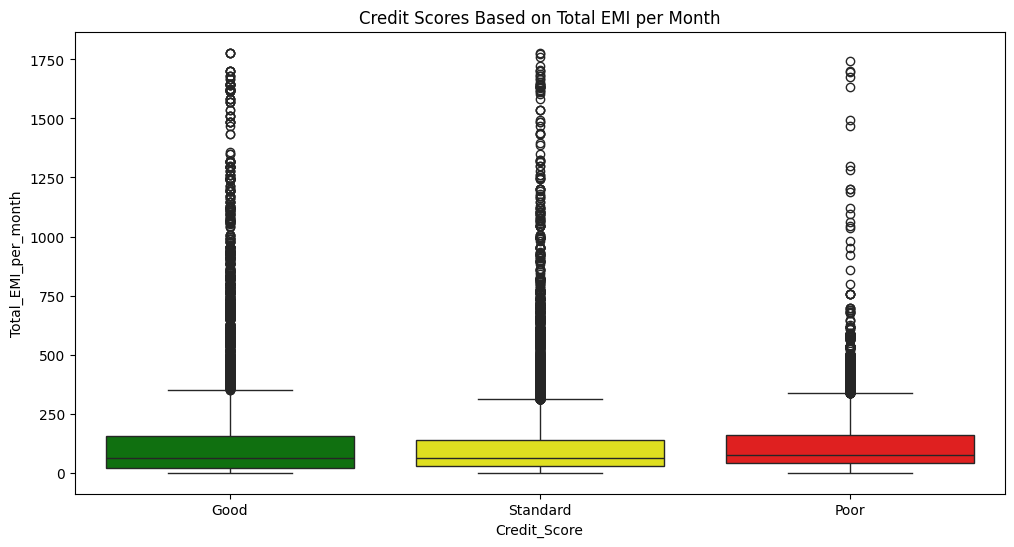

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1  group2  meandiff p-adj  lower    upper  reject
------------------------------------------------------
  Good     Poor -10.4927   0.0 -13.4378 -7.5475   True
  Good Standard -20.5912   0.0 -23.2693 -17.913   True
  Poor Standard -10.0985   0.0 -12.3575 -7.8394   True
------------------------------------------------------


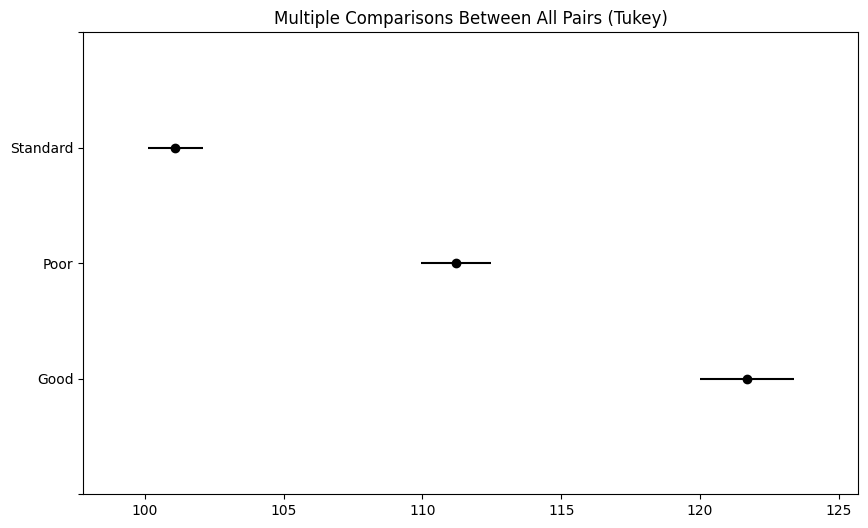

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
# Define color mapping
palette = {'Poor': 'red', 'Standard': 'yellow', 'Good': 'green'}

# Separate Total EMI per Month by Credit Score categories
good_emi = data[data['Credit_Score'] == 'Good']['Total_EMI_per_month']
standard_emi = data[data['Credit_Score'] == 'Standard']['Total_EMI_per_month']
poor_emi = data[data['Credit_Score'] == 'Poor']['Total_EMI_per_month']

# Perform ANOVA
f_stat, p_value = f_oneway(good_emi, standard_emi, poor_emi)
print(f"ANOVA F-statistic: {f_stat}")
print(f"ANOVA p-value: {p_value}")

if p_value < 0.05:
    print("The differences between groups are statistically significant.")
else:
    print("The differences between groups are not statistically significant.")

# Plotting the box plot for visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x='Credit_Score', y='Total_EMI_per_month', data=data, palette=palette)
plt.title('Credit Scores Based on Total EMI per Month')
plt.show()

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=data['Total_EMI_per_month'], groups=data['Credit_Score'], alpha=0.05)

# Print the summary of the test
print(tukey.summary())

# Visualize the test results
fig, ax = plt.subplots(figsize=(10, 6))
tukey.plot_simultaneous(ax=ax)
plt.show()

Individuals with Poor credit scores tend to have the highest EMI payments, followed by those with Standard credit scores, and then those with Good credit scores

**Credit Management vs Credit score**

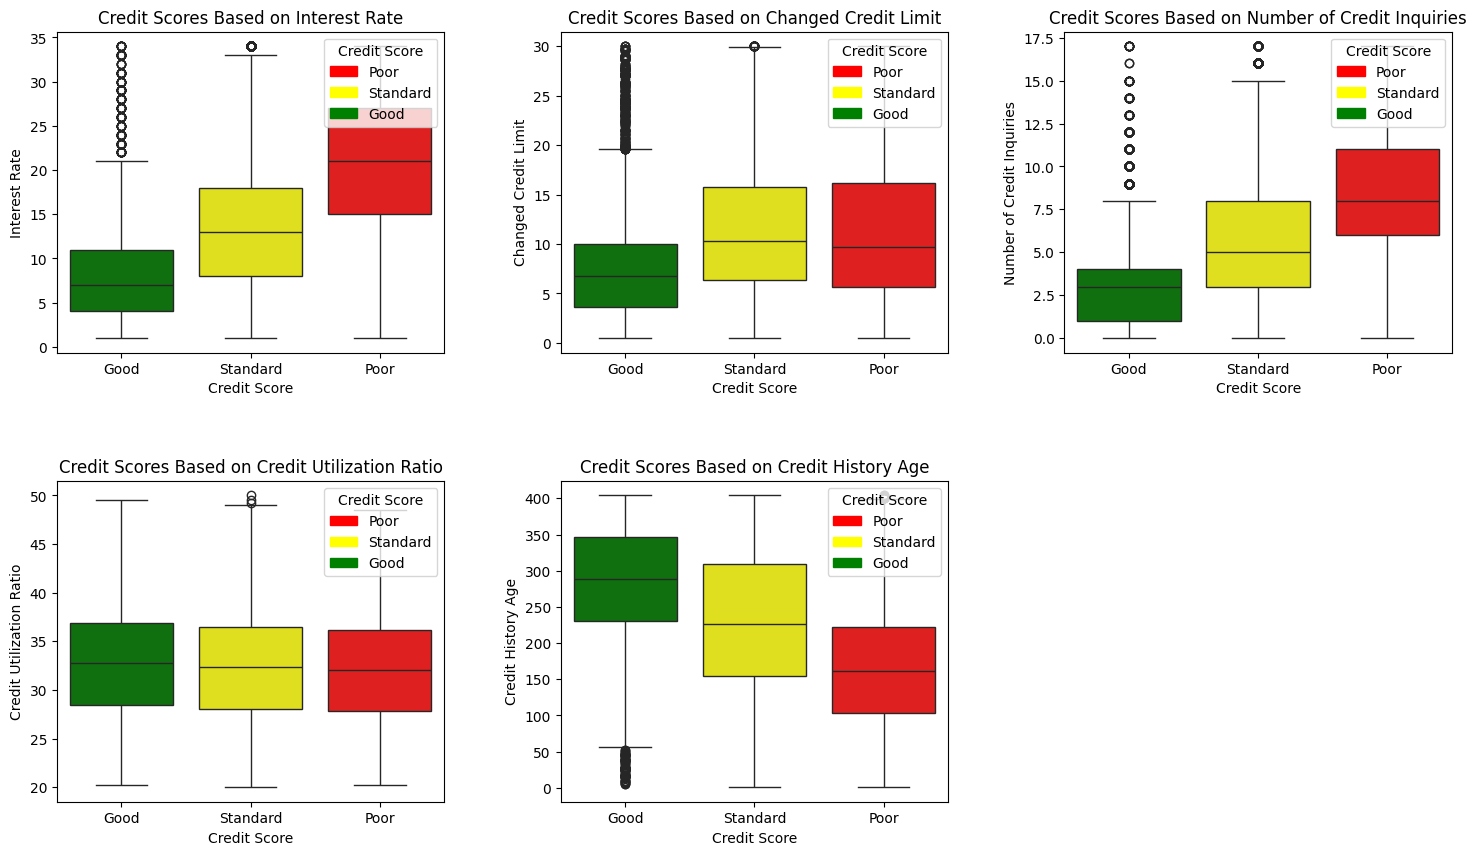

In [ ]:

# Assuming 'data' is your DataFrame and 'palette' is defined
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # 2 rows, 3 columns
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust space between plots

# Plot 1: Interest Rate
sns.boxplot(ax=axes[0, 0], x='Credit_Score', y='Interest_Rate', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[0, 0].set_title('Credit Scores Based on Interest Rate')
axes[0, 0].set_xlabel('Credit Score')
axes[0, 0].set_ylabel('Interest Rate')

# Create legend labels for Interest Rate
legend_labels = [mpatches.Patch(color=color, label=score) for score, color in palette.items()]
axes[0, 0].legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Plot 2: Changed Credit Limit
sns.boxplot(ax=axes[0, 1], x='Credit_Score', y='Changed_Credit_Limit', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[0, 1].set_title('Credit Scores Based on Changed Credit Limit')
axes[0, 1].set_xlabel('Credit Score')
axes[0, 1].set_ylabel('Changed Credit Limit')

# Create legend labels for Changed Credit Limit
axes[0, 1].legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Plot 3: Number of Credit Inquiries
sns.boxplot(ax=axes[0, 2], x='Credit_Score', y='Num_Credit_Inquiries', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[0, 2].set_title('Credit Scores Based on Number of Credit Inquiries')
axes[0, 2].set_xlabel('Credit Score')
axes[0, 2].set_ylabel('Number of Credit Inquiries')

# Create legend labels for Number of Credit Inquiries
axes[0, 2].legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Plot 4: Credit Utilization Ratio
sns.boxplot(ax=axes[1, 0], x='Credit_Score', y='Credit_Utilization_Ratio', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[1, 0].set_title('Credit Scores Based on Credit Utilization Ratio')
axes[1, 0].set_xlabel('Credit Score')
axes[1, 0].set_ylabel('Credit Utilization Ratio')

# Create legend labels for Credit Utilization Ratio
axes[1, 0].legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Plot 5: Credit History Age
sns.boxplot(ax=axes[1, 1], x='Credit_Score', y='Credit_History_Age', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[1, 1].set_title('Credit Scores Based on Credit History Age')
axes[1, 1].set_xlabel('Credit Score')
axes[1, 1].set_ylabel('Credit History Age')

# Create legend labels for Credit History Age
axes[1, 1].legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Hide the last subplot (1, 2) since we have only five plots
axes[1, 2].axis('off')

# Show the plot
plt.show()

In [ ]:
import scipy.stats as stats
# Perform ANOVA
anova_result = stats.f_oneway(
    data[data['Credit_Score'] == 'Good']['Credit_Utilization_Ratio'],
    data[data['Credit_Score'] == 'Standard']['Credit_Utilization_Ratio'],
    data[data['Credit_Score'] == 'Poor']['Credit_Utilization_Ratio']
)

print("ANOVA Test Result")
print("=================")
print(f"F-statistic: {anova_result.statistic}")
print(f"p-value: {anova_result.pvalue}")

ANOVA Test Result
F-statistic: 105.29672169033603
p-value: 2.0811372175521815e-46


* If the average interest rate is 4 – 11%, the credit score is good. Having an average interest rate of more than 15% is bad for your credit scores.
* Good Credit Scores are associated with smaller changes in credit limits and fewer credit inquiries.
Poor Credit Scores are linked to larger changes in credit limits and more credit inquiries
* Credit utilization ratio means your total debt divided by your total available credit.
A higher credit utilization ratio can negatively impact a credit score because it suggests that a borrower might be over-relying on credit and could be at a higher risk of default. Conversely, a lower credit utilization ratio is generally favorable for credit scores as it indicates better credit management and lower risk.
* So, having a long credit history results in better credit scores

**Investments and Savings vs credit Score**

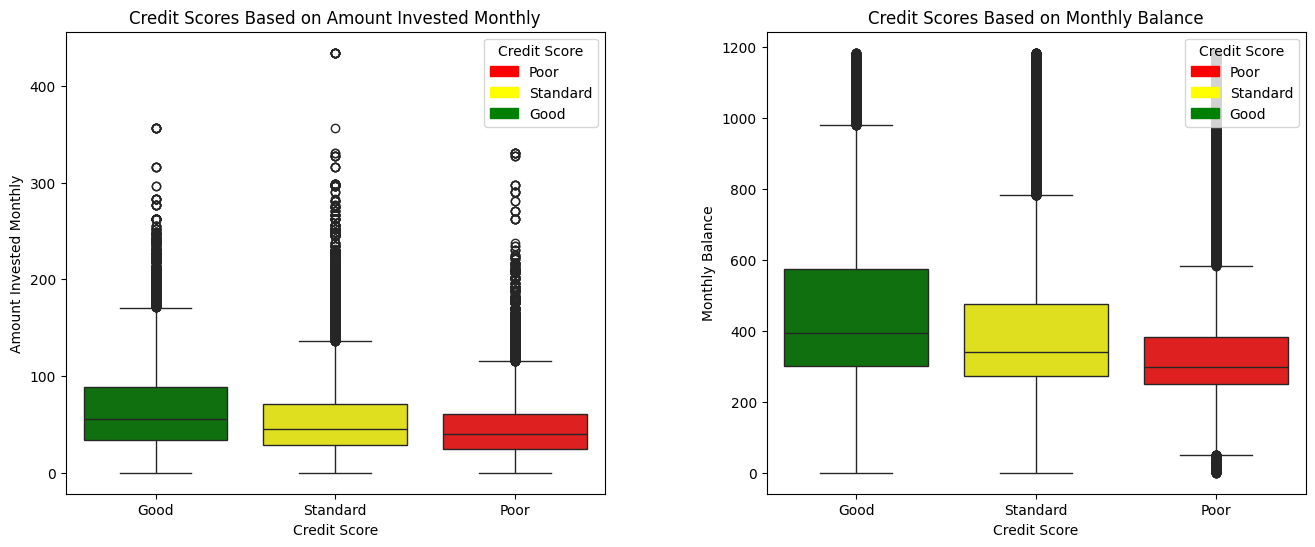

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))  # 1 row, 2 columns
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust space between plots

# Plot 1: Amount Invested Monthly
sns.boxplot(ax=axes[0], x='Credit_Score', y='Amount_invested_monthly', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[0].set_title('Credit Scores Based on Amount Invested Monthly')
axes[0].set_xlabel('Credit Score')
axes[0].set_ylabel('Amount Invested Monthly')

# Create legend labels for Amount Invested Monthly
legend_labels = [mpatches.Patch(color=color, label=score) for score, color in palette.items()]
axes[0].legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Plot 2: Monthly Balance
sns.boxplot(ax=axes[1], x='Credit_Score', y='Monthly_Balance', data=data, hue='Credit_Score', dodge=False, palette=palette)
axes[1].set_title('Credit Scores Based on Monthly Balance')
axes[1].set_xlabel('Credit Score')
axes[1].set_ylabel('Monthly Balance')

# Create legend labels for Monthly Balance
axes[1].legend(handles=legend_labels, title='Credit Score', loc='upper right')

# Show the plot
plt.show()

* The amount of money you invest monthly doesn’t affect  your credit scores a lot.

* Monthly balances are similar across Good, Poor, and Standard credit scores, with similar medians around 400, interquartile ranges between approximately 200 and 600, but with more outliers above 1000 in the Good and Standard categories.So, having a high monthly balance in your account at the end of the month is good for your credit scores. A monthly balance of less than $250 is bad for credit scores.


**Categorical columns vs Credit score**

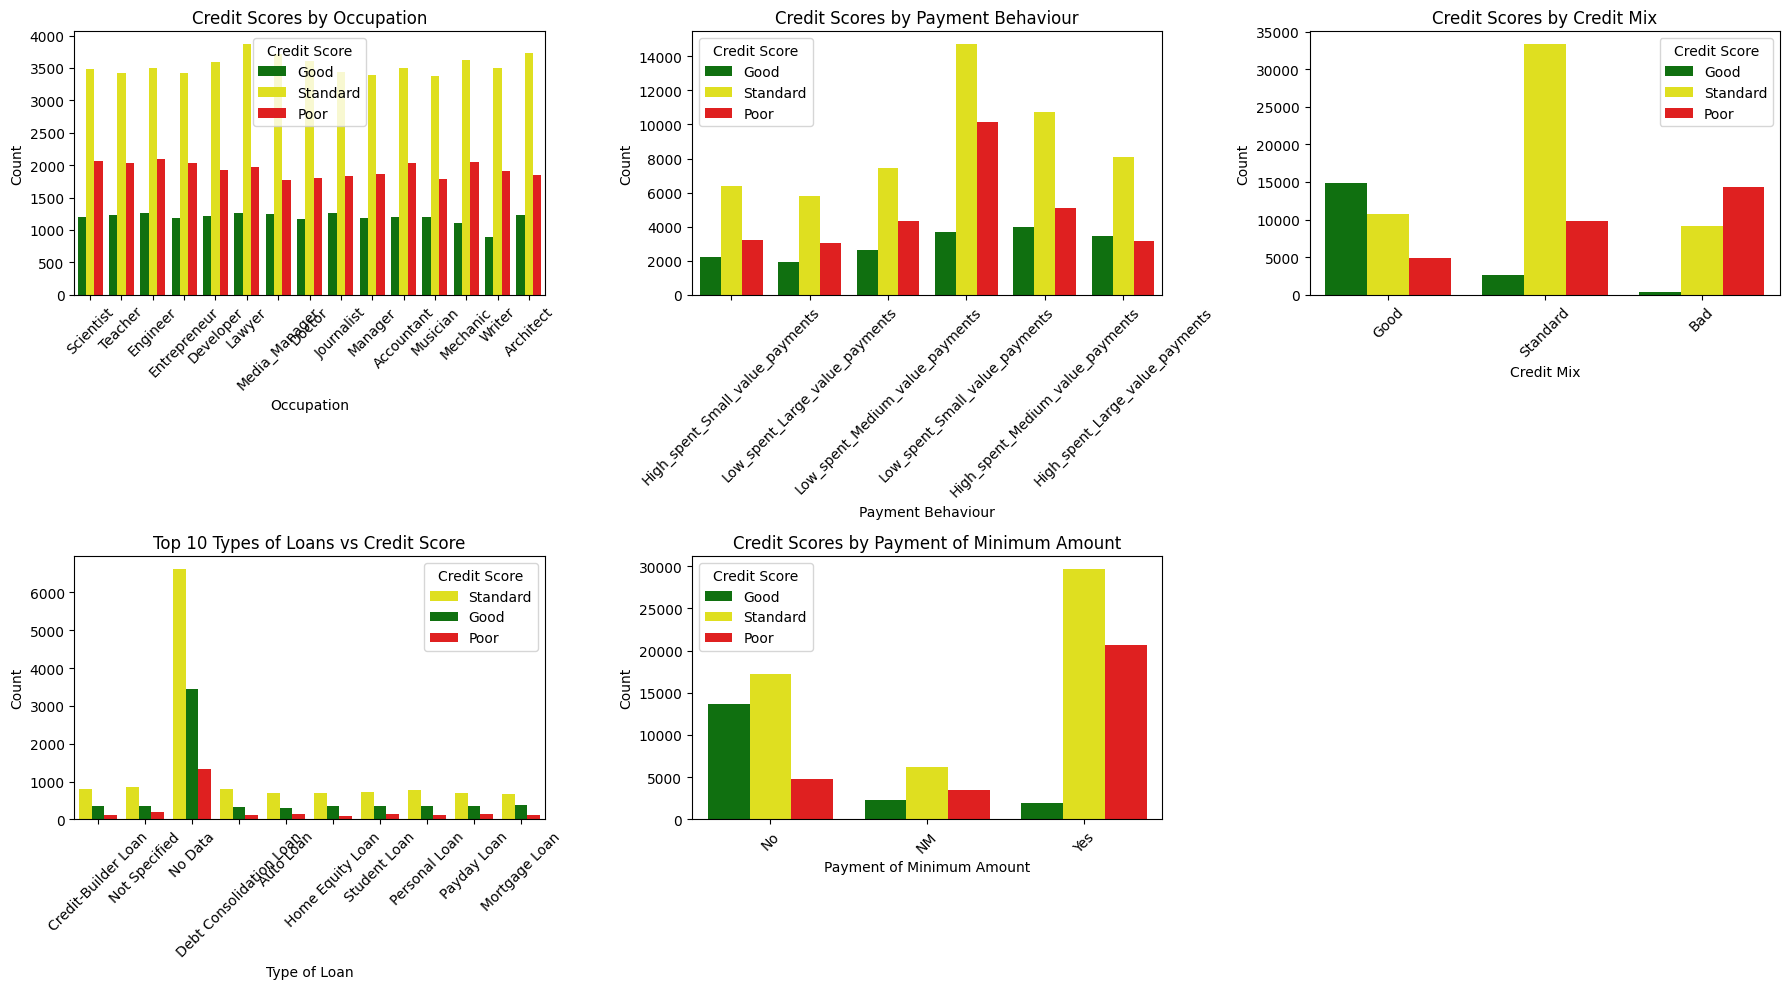

In [ ]:
# Create a figure with a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # 2 rows, 3 columns
fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust space between plots

# Plot 1: Occupation
sns.countplot(ax=axes[0, 0], x='Occupation', hue='Credit_Score', data=data, palette=palette)
axes[0, 0].set_title('Credit Scores by Occupation')
axes[0, 0].set_xlabel('Occupation')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend(title='Credit Score')
axes[0, 0].tick_params(axis='x', rotation=45)  # Rotate x-tick labels

# Plot 2: Payment Behaviour
sns.countplot(ax=axes[0, 1], x='Payment_Behaviour', hue='Credit_Score', data=data, palette=palette)
axes[0, 1].set_title('Credit Scores by Payment Behaviour')
axes[0, 1].set_xlabel('Payment Behaviour')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(title='Credit Score')
axes[0, 1].tick_params(axis='x', rotation=45)  # Rotate x-tick labels

# Plot 3: Credit Mix
sns.countplot(ax=axes[0, 2], x='Credit_Mix', hue='Credit_Score', data=data, palette=palette)
axes[0, 2].set_title('Credit Scores by Credit Mix')
axes[0, 2].set_xlabel('Credit Mix')
axes[0, 2].set_ylabel('Count')
axes[0, 2].legend(title='Credit Score')
axes[0, 2].tick_params(axis='x', rotation=45)  # Rotate x-tick labels

# Get top 10 types of loans
top_loan_types = data['Type_of_Loan'].value_counts().nlargest(10).index
filtered_data = data[data['Type_of_Loan'].isin(top_loan_types)]

# Plot 4: Top 10 Types of Loans vs Credit Score
sns.countplot(ax=axes[1, 0], x='Type_of_Loan', hue='Credit_Score', data=filtered_data, palette=palette)
axes[1, 0].set_title('Top 10 Types of Loans vs Credit Score')
axes[1, 0].set_xlabel('Type of Loan')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='Credit Score')
axes[1, 0].tick_params(axis='x', rotation=45)  # Rotate x-tick labels

# Plot 5: Payment of Minimum Amount
sns.countplot(ax=axes[1, 1], x='Payment_of_Min_Amount', hue='Credit_Score', data=data, palette=palette)
axes[1, 1].set_title('Credit Scores by Payment of Minimum Amount')
axes[1, 1].set_xlabel('Payment of Minimum Amount')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Credit Score')
axes[1, 1].tick_params(axis='x', rotation=45)  # Rotate x-tick labels

# Hide unused subplot (1, 2)
axes[1, 2].axis('off')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


* "Standard" credit scores are the most common across most occupations.
Occupation seems to have a similar distribution of credit scores, with no occupation standing out significantly.
* "Standard" scores are most common for "High_spent_Medium_value_payments".
Different payment behaviors have varied distributions of credit scores.
* "Standard" credit scores dominate in the "Standard" credit mix category.
* "No Data" category has a large count of "Standard" credit scores.
Credit Scores by Payment of Minimum Amount:
* "Yes" category has a higher count of "Standard" and "Poor" credit scores compared to "Good" scores.

**4.DATA TRANSFORMATION**

**4.1 Data Cleaning**

Based on analysis,we can drop following columns

In [ ]:
columns_to_drop = ['Color']

# Drop columns from the DataFrame
data = data.drop(columns=columns_to_drop)

In [53]:

columns_to_drop = [ 'Month','Occupation', 'Type_of_Loan']

# Drop columns from the DataFrame
data = data.drop(columns=columns_to_drop)

In [54]:
# Columns to remove
irrelevant_columns = ['ID', 'Customer_ID', 'SSN','Name']# These are unique identifiers &doesn't add value to our prediction.

# Drop irrelevant columns
data = data.drop(columns=irrelevant_columns)

**4.1.1 Handling Missing Values**

In [55]:
data.isnull().sum()#checking for missing values

Age                         0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

no missing values,so no need of imputation

**4.1.2 Handle Duplicate Values**

In [10]:
data.duplicated().sum()

0

There are no duplicates in the data.

**4.2 Handle Outliers**

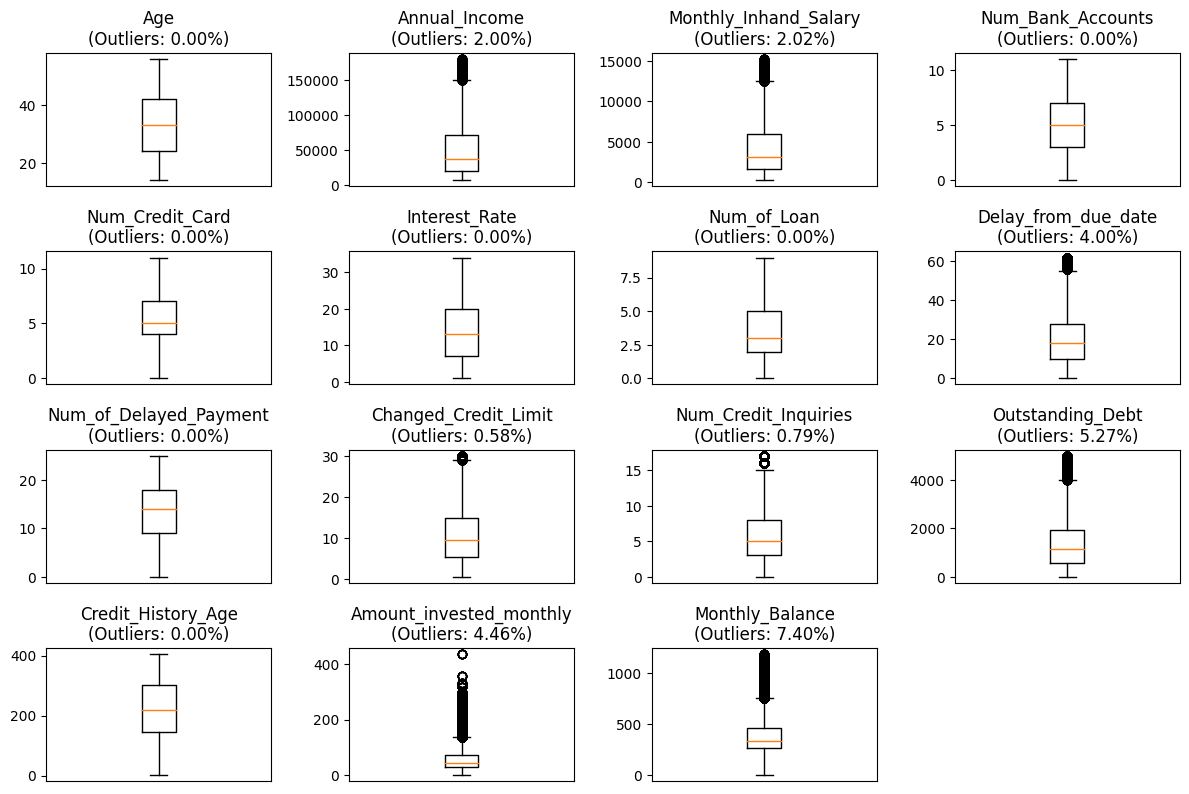

In [11]:
#boxplot before handling outliers
continuous_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt','Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance']

outlier_percentages = {}
for col in continuous_columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers_percentage = ((data[col] < lower_bound) | (data[col] > upper_bound)).mean() * 100
    outlier_percentages[col] = outliers_percentage

# Create subplots for each continuous column
plt.figure(figsize=(12, 10))
for i, col in enumerate(continuous_columns, start=1):
    plt.subplot(5, 4, i)
    plt.boxplot(data[col])
    plt.title(f'{col}\n(Outliers: {outlier_percentages[col]:.2f}%)')
    plt.xticks([])

plt.tight_layout()
plt.show()

The outliers identified are genuine, making clipping unjustifiable. While transformations based on skewness reduced the percentage of outliers, they did not improve model performance. Although rigorous transformations effectively removed outliers, they led to overfitting. Therefore, robust methods less susceptible to outliers, such as Random Forest, Decision Tree, Gradient Boosting, XGBoost, and LightGBM, were chosen.

**4.3 Encoding**

credit_mix and credit_score are ordinal categories, so I'll be replacing their categories with -1, 0, and 1, in order for them .Used mapping for payment behaviour and Payment of min amount as well.

In [56]:
# Define the mapping dictionaries
payment_behaviour_labels = {
    'Low_spent_Small_value_payments': 0,
    'Low_spent_Medium_value_payments': 1,
    'Low_spent_Large_value_payments': 2,
    'High_spent_Small_value_payments': 3,
    'High_spent_Medium_value_payments': 4,
    'High_spent_Large_value_payments': 5
}

payment_of_min_amount_labels = {
    'Yes': 2,
    'No': 1,
    'NM': 0
}

credit_mix_mapping = {'Bad': 0, 'Standard': 1, 'Good': 2}
credit_score_mapping = {'Poor': 0, 'Standard': 1, 'Good': 2}#for Xgb

# Map the 'Payment_Behaviour' column
data['Payment_Behaviour'] = data['Payment_Behaviour'].map(payment_behaviour_labels).astype('int64')

# Map the 'Payment_of_Min_Amount' column
data['Payment_of_Min_Amount'] = data['Payment_of_Min_Amount'].map(payment_of_min_amount_labels).astype('int64')

# Apply the mapping to the 'Credit_Mix' column
data['Credit_Mix'] = data['Credit_Mix'].map(credit_mix_mapping)

# Apply the mapping to the 'Credit_Score' column
data['Credit_Score'] = data['Credit_Score'].map(credit_score_mapping)

# Display the resulting DataFrame
print(data)

        Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      23.0       19114.12            1824.843333                3.0   
1      23.0       19114.12            1824.843333                3.0   
2      23.0       19114.12            1824.843333                3.0   
3      23.0       19114.12            1824.843333                3.0   
4      23.0       19114.12            1824.843333                3.0   
...     ...            ...                    ...                ...   
99995  25.0       39628.99            3359.415833                4.0   
99996  25.0       39628.99            3359.415833                4.0   
99997  25.0       39628.99            3359.415833                4.0   
99998  25.0       39628.99            3359.415833                4.0   
99999  25.0       39628.99            3359.415833                4.0   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                  4.0            3.0          4.0          

**4.4 Removing Highly correlated datas**

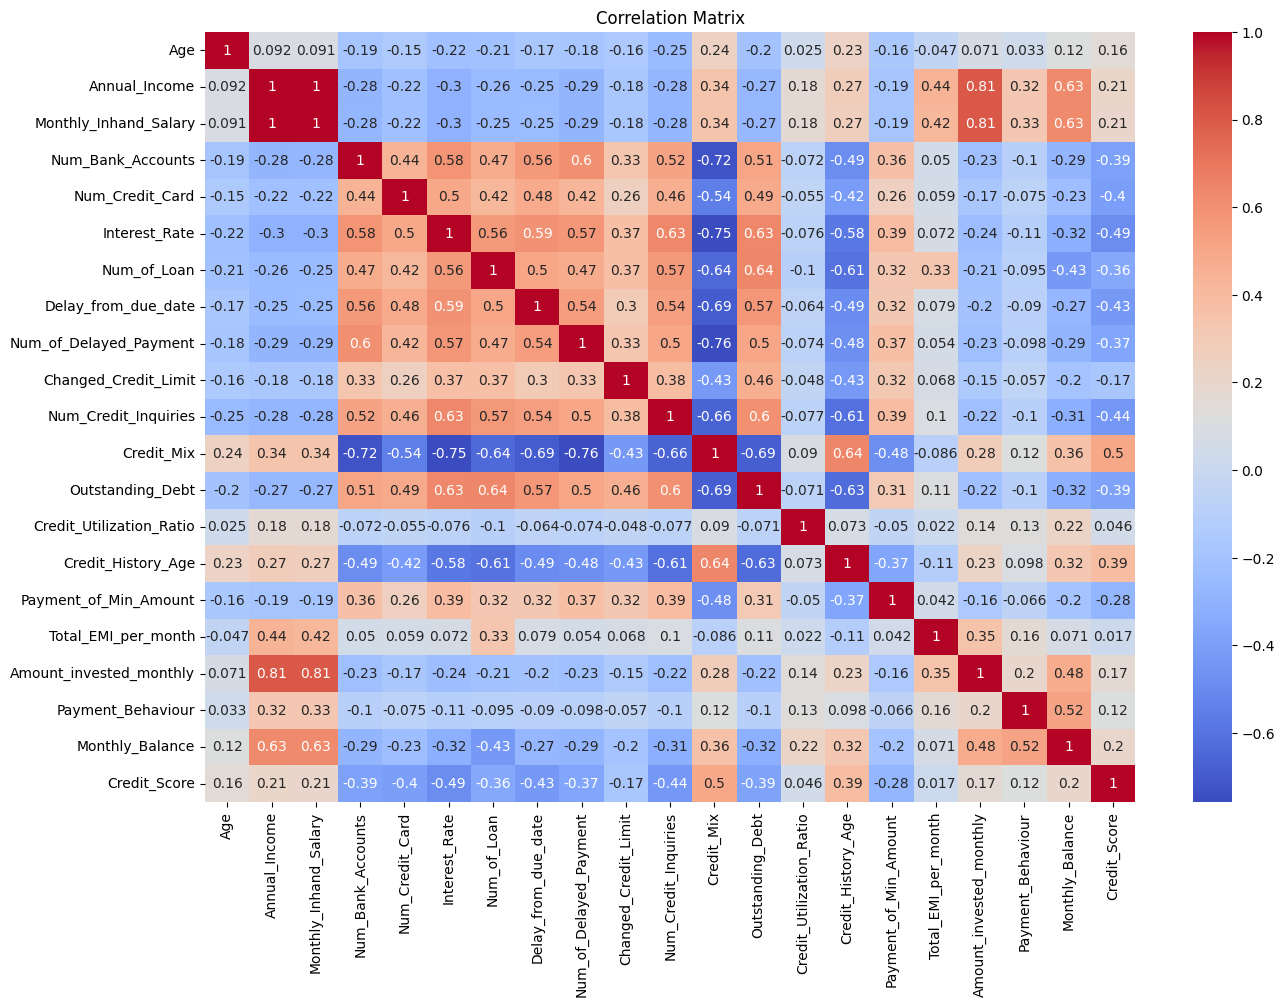

In [57]:

# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [58]:
# Define the correlation threshold
correlation_threshold = 0.8

# Filter the correlation matrix to include only highly correlated pairs
highly_correlated = corr_matrix[(corr_matrix > correlation_threshold) & (corr_matrix < 1)]

# Print highly correlated data
print("Highly Correlated Data:")
for col in highly_correlated:
    correlated_vars = highly_correlated[col][highly_correlated[col].notnull()]
    for idx, val in correlated_vars.items():
      print(f"{col} and {idx}: {val:.2f}")

Highly Correlated Data:
Annual_Income and Monthly_Inhand_Salary: 1.00
Annual_Income and Amount_invested_monthly: 0.81
Monthly_Inhand_Salary and Annual_Income: 1.00
Monthly_Inhand_Salary and Amount_invested_monthly: 0.81
Amount_invested_monthly and Annual_Income: 0.81
Amount_invested_monthly and Monthly_Inhand_Salary: 0.81


*We* can drop one of the highly correlated columns from each pair to avoid redundancy

In [59]:
# List of columns to drop
columns_to_drop = ['Monthly_Inhand_Salary','Amount_invested_monthly']

# Check if columns exist in the DataFrame
print("Columns before dropping:", data.columns.tolist())

# Drop the columns and save the result back to the 'data' DataFrame
data = data.drop(columns=columns_to_drop)

# Verify the columns have been dropped
print(f"Columns dropped: {columns_to_drop}")
print("Remaining columns:", data.columns.tolist())

Columns before dropping: ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']
Columns dropped: ['Monthly_Inhand_Salary', 'Amount_invested_monthly']
Remaining columns: ['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']


**4.5 Data Splitting**

In [61]:
# Features and target
X = data.drop(columns=['Credit_Score'])
y = data['Credit_Score']

# Step 1: Split the data into 70% training and 30% temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 2: Split the temporary set into 50% validation and 50% test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


**4.6  Class Imbalance -Applying SMOTE**

In [62]:
#  Apply SMOTE only to the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

**4.7 Robust Scaling**

In [63]:
#  Scale the data using RobustScaler
scaler = RobustScaler()

# Fit the scaler on the training data and transform the training data
X_train_res = scaler.fit_transform(X_train_res)

# Transform the validation and test data using the fitted scaler
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Display the sizes of the resulting sets
print(f'Training set size: {X_train_res.shape[0]}')
print(f'Validation set size: {X_val.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

Training set size: 111666
Validation set size: 15000
Test set size: 15000


**4.8.Recursive Feature Elimination with Cross-Validation (RFECV)**

In [64]:
# Recursive Feature Elimination with Cross-Validation (RFECV)
rf = RandomForestClassifier(random_state=42, n_jobs=-1)  # Utilize all available CPU cores
rfecv = RFECV(estimator=rf, step=2, cv=StratifiedKFold(3), scoring='accuracy')  # Increase step size and reduce number of folds
rfecv.fit(X_train_res, y_train_res)

print("Optimal number of features: %d" % rfecv.n_features_)
print("Feature ranking: ", rfecv.ranking_)

# Get the feature importance scores
feature_importance = rfecv.estimator_.feature_importances_
features = X.columns[rfecv.support_]  # Only get the selected features
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature importances:")
print(feature_importance_df)

# Evaluate on the validation set
y_val_pred = rfecv.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")



print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

Optimal number of features: 16
Feature ranking:  [1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1]
Feature importances:
                     Feature  Importance
10          Outstanding_Debt    0.121997
9                 Credit_Mix    0.103274
4              Interest_Rate    0.097593
12        Credit_History_Age    0.076282
5        Delay_from_due_date    0.069911
8       Num_Credit_Inquiries    0.062878
7       Changed_Credit_Limit    0.055525
15           Monthly_Balance    0.050143
1              Annual_Income    0.049963
14       Total_EMI_per_month    0.049404
6     Num_of_Delayed_Payment    0.046634
11  Credit_Utilization_Ratio    0.046322
3            Num_Credit_Card    0.044045
2          Num_Bank_Accounts    0.043452
0                        Age    0.042989
13     Payment_of_Min_Amount    0.039588
Validation Accuracy: 0.8063
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      4349
           1       0.85 

In [74]:
X_train_optimal = X_train_res[:, rfecv.support_]
X_val_optimal = X_val[:, rfecv.support_]


**5.DATA MODELLING**

**5.1 With Optimal number of features: 16**

In [77]:
# Define your models
models = {
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(random_state=42)
}

for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name):
        # Train the model
        model.fit(X_train_optimal, y_train_res) # Use y_train_res instead of y_train)

        # Predict on validation data
        y_val_pred = model.predict(X_val_optimal)

        # Calculate metrics
        val_accuracy = accuracy_score(y_val, y_val_pred)
        val_report = classification_report(y_val, y_val_pred, output_dict=True)

        # Log model and metrics with MLflow
        mlflow.log_params(model.get_params())
        mlflow.log_metric("Validation Accuracy", val_accuracy)
        mlflow.log_dict(val_report, "Validation Classification Report")
        mlflow.sklearn.log_model(model, "model")

        # Print and log feature importance if available
        if hasattr(model, 'feature_importances_'):
            feature_importance = model.feature_importances_
            features = X_train.columns[rfecv.support_]  # Extract feature names after RFECV
            feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
            feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)



            print(f"Feature Importances for {model_name}:")
            print(feature_importance_df)
        else:
            print(f"{model_name} does not have feature importances.")

        # Print other model details
        print(f"Model: {model_name}")
        print(f"Validation Accuracy: {val_accuracy:.4f}")
        print("Validation Classification Report:")
        print(val_report)

Feature Importances for Random Forest:
                     Feature  Importance
10          Outstanding_Debt    0.121997
9                 Credit_Mix    0.103274
4              Interest_Rate    0.097593
12        Credit_History_Age    0.076282
5        Delay_from_due_date    0.069911
8       Num_Credit_Inquiries    0.062878
7       Changed_Credit_Limit    0.055525
15           Monthly_Balance    0.050143
1              Annual_Income    0.049963
14       Total_EMI_per_month    0.049404
6     Num_of_Delayed_Payment    0.046634
11  Credit_Utilization_Ratio    0.046322
3            Num_Credit_Card    0.044045
2          Num_Bank_Accounts    0.043452
0                        Age    0.042989
13     Payment_of_Min_Amount    0.039588
Model: Random Forest
Validation Accuracy: 0.8063
Validation Classification Report:
{'0': {'precision': 0.7839347079037801, 'recall': 0.8392733961830305, 'f1-score': 0.8106607440310938, 'support': 4349}, '1': {'precision': 0.847817272604406, 'recall': 0.78648445336

2024/07/24 07:25:27 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpiute54yo/model/model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.2.2', 'cloudpickle==2.2.1']. Set logging level to DEBUG to see the full traceback. 


Feature Importances for LightGBM:
                     Feature  Importance
1              Annual_Income         941
10          Outstanding_Debt         863
14       Total_EMI_per_month         829
6     Num_of_Delayed_Payment         745
8       Num_Credit_Inquiries         690
5        Delay_from_due_date         686
4              Interest_Rate         675
3            Num_Credit_Card         626
12        Credit_History_Age         624
0                        Age         563
2          Num_Bank_Accounts         554
7       Changed_Credit_Limit         551
15           Monthly_Balance         211
9                 Credit_Mix         175
11  Credit_Utilization_Ratio         144
13     Payment_of_Min_Amount         123
Model: LightGBM
Validation Accuracy: 0.7289
Validation Classification Report:
{'0': {'precision': 0.710856171659231, 'recall': 0.7693722694872385, 'f1-score': 0.7389575971731449, 'support': 4349}, '1': {'precision': 0.8330252618607517, 'recall': 0.6780341023069207, 'f1

**5.2 With Optimal number of features:7**

In [85]:


# Define the top features dictionary for each model
top_features_dict = {
    'Random Forest': ['Outstanding_Debt', 'Credit_Mix', 'Interest_Rate', 'Credit_History_Age',
                       'Delay_from_due_date', 'Num_Credit_Inquiries', 'Changed_Credit_Limit'],
    'Decision Tree': ['Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Interest_Rate',
                       'Monthly_Balance', 'Delay_from_due_date', 'Credit_Utilization_Ratio'],
    'Gradient Boosting': ['Credit_Mix', 'Outstanding_Debt', 'Interest_Rate', 'Num_Credit_Card',
                           'Delay_from_due_date', 'Num_Credit_Inquiries', 'Payment_of_Min_Amount'],
    'XGBoost': ['Credit_Mix', 'Outstanding_Debt', 'Payment_of_Min_Amount', 'Interest_Rate',
                'Num_Credit_Card', 'Num_Bank_Accounts', 'Num_Credit_Inquiries'],
    'LightGBM': ['Annual_Income', 'Outstanding_Debt', 'Total_EMI_per_month', 'Num_of_Delayed_Payment',
                 'Num_Credit_Inquiries', 'Delay_from_due_date', 'Interest_Rate']
}


# Redefine the feature set with top 7 features (or all if not available)
for model_name, model in models.items():
    # Get top 7 features for the model
    top_features = top_features_dict.get(model_name, [])[:7]  # Ensure there are at most 7 features

    if len(top_features) == 0:
        print(f"No top features found for {model_name}. Skipping model.")
        continue

    # Ensure X_train_res and X_val are DataFrames and have the correct columns for indexing
    X_train_optimal = pd.DataFrame(X_train_res, columns=X.columns)[top_features]
    X_val_optimal = pd.DataFrame(X_val, columns=X.columns)[top_features]

    with mlflow.start_run(run_name=model_name):
        # Train the model
        model.fit(X_train_optimal, y_train_res)

        # Predict on validation data
        y_val_pred = model.predict(X_val_optimal)

        # Calculate metrics
        val_accuracy = accuracy_score(y_val, y_val_pred)
        val_report = classification_report(y_val, y_val_pred, output_dict=True)

        # Log model and metrics with MLflow
        mlflow.log_params(model.get_params())
        mlflow.log_metric("Validation Accuracy", val_accuracy)
        mlflow.log_dict(val_report, "Validation Classification Report")
        mlflow.sklearn.log_model(model, "model")

        # Print top feature names
        print(f"Model: {model_name}")
        print(f"Top Features (up to 7): {top_features}")
        print(f"Validation Accuracy: {val_accuracy:.4f}")
        print("Validation Classification Report:")
        print(val_report)


Model: Random Forest
Top Features (up to 7): ['Outstanding_Debt', 'Credit_Mix', 'Interest_Rate', 'Credit_History_Age', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Changed_Credit_Limit']
Validation Accuracy: 0.7967
Validation Classification Report:
{'0': {'precision': 0.7907602601480153, 'recall': 0.8107610945044837, 'f1-score': 0.8006357856494096, 'support': 4349}, '1': {'precision': 0.8328054895750858, 'recall': 0.7912487462387161, 'f1-score': 0.8114954352578115, 'support': 7976}, '2': {'precision': 0.7134660816739791, 'recall': 0.7902803738317757, 'f1-score': 0.7499113160695282, 'support': 2675}, 'accuracy': 0.7967333333333333, 'macro avg': {'precision': 0.7790106104656934, 'recall': 0.7974300715249919, 'f1-score': 0.7873475123255832, 'support': 15000}, 'weighted avg': {'precision': 0.7993329816474999, 'recall': 0.7967333333333333, 'f1-score': 0.7973643595927716, 'support': 15000}}
Model: Decision Tree
Top Features (up to 7): ['Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age

**5.3 With Optimal number of features: 11**

In [86]:
# Define the top features dictionary for each model
top_features_dict = {
    'Random Forest': ['Outstanding_Debt', 'Credit_Mix', 'Interest_Rate', 'Credit_History_Age',
                      'Delay_from_due_date', 'Num_Credit_Inquiries', 'Changed_Credit_Limit',
                      'Monthly_Balance', 'Annual_Income', 'Total_EMI_per_month', 'Num_of_Delayed_Payment'],
    'Decision Tree': ['Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Interest_Rate',
                      'Monthly_Balance', 'Delay_from_due_date', 'Credit_Utilization_Ratio',
                      'Changed_Credit_Limit', 'Annual_Income', 'Total_EMI_per_month', 'Num_of_Delayed_Payment'],
    'Gradient Boosting': ['Credit_Mix', 'Outstanding_Debt', 'Interest_Rate', 'Num_Credit_Card',
                          'Delay_from_due_date', 'Num_Credit_Inquiries', 'Payment_of_Min_Amount',
                          'Changed_Credit_Limit', 'Annual_Income', 'Total_EMI_per_month', 'Num_of_Delayed_Payment'],
    'XGBoost': ['Credit_Mix', 'Outstanding_Debt', 'Payment_of_Min_Amount', 'Interest_Rate',
                'Num_Credit_Card', 'Num_Bank_Accounts', 'Num_Credit_Inquiries',
                'Changed_Credit_Limit', 'Annual_Income', 'Total_EMI_per_month', 'Num_of_Delayed_Payment'],
    'LightGBM': ['Annual_Income', 'Outstanding_Debt', 'Total_EMI_per_month', 'Num_of_Delayed_Payment',
                 'Num_Credit_Inquiries', 'Delay_from_due_date', 'Interest_Rate',
                 'Num_Credit_Card', 'Changed_Credit_Limit', 'Monthly_Balance', 'Credit_Utilization_Ratio']
}

# Redefine the feature set with top 11 features
for model_name, model in models.items():
    # Get top 11 features for the model
    top_features = top_features_dict.get(model_name, [])[:11]  # Ensure there are at most 11 features

    if len(top_features) == 0:
        print(f"No top features found for {model_name}. Skipping model.")
        continue

    # Ensure X_train_res and X_val are DataFrames and have the correct columns for indexing
    X_train_optimal = pd.DataFrame(X_train_res, columns=X.columns)[top_features]
    X_val_optimal = pd.DataFrame(X_val, columns=X.columns)[top_features]

    with mlflow.start_run(run_name=model_name):
        # Train the model
        model.fit(X_train_optimal, y_train_res)

        # Predict on validation data
        y_val_pred = model.predict(X_val_optimal)

        # Calculate metrics
        val_accuracy = accuracy_score(y_val, y_val_pred)
        val_report = classification_report(y_val, y_val_pred, output_dict=True)

        # Log model and metrics with MLflow
        mlflow.log_params(model.get_params())
        mlflow.log_metric("Validation Accuracy", val_accuracy)
        mlflow.log_dict(val_report, "Validation Classification Report")
        mlflow.sklearn.log_model(model, "model")

        # Print top feature names
        print(f"Model: {model_name}")
        print(f"Top Features (up to 11): {top_features}")
        print(f"Validation Accuracy: {val_accuracy:.4f}")
        print("Validation Classification Report:")
        print(val_report)

Model: Random Forest
Top Features (up to 11): ['Outstanding_Debt', 'Credit_Mix', 'Interest_Rate', 'Credit_History_Age', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Changed_Credit_Limit', 'Monthly_Balance', 'Annual_Income', 'Total_EMI_per_month', 'Num_of_Delayed_Payment']
Validation Accuracy: 0.8031
Validation Classification Report:
{'0': {'precision': 0.7866145154280747, 'recall': 0.8323752586801564, 'f1-score': 0.8088481733884482, 'support': 4349}, '1': {'precision': 0.8438297300926547, 'recall': 0.7878635907723169, 'f1-score': 0.8148868572910587, 'support': 7976}, '2': {'precision': 0.7261945103354795, 'recall': 0.8011214953271028, 'f1-score': 0.7618201208674014, 'support': 2675}, 'accuracy': 0.8031333333333334, 'macro avg': {'precision': 0.7855462519520696, 'recall': 0.8071201149265254, 'f1-score': 0.7951850505156361, 'support': 15000}, 'weighted avg': {'precision': 0.8062628513308746, 'recall': 0.8031333333333334, 'f1-score': 0.8036724735426762, 'support': 15000}}
Model: Decisi

Using an optimal number of 16 features provided the best performance across all models. However, reducing the number of features can still be beneficial for improving model efficiency and interpretability. For example, with only 7 features, performance significantly decreased, indicating that too few features may lead to loss of critical information. In contrast, with 11 features, performance was close to that with 16 features, suggesting that fewer features can still yield robust results while potentially improving model efficiency and interpretability. This balance allows for more streamlined models without substantial loss in performance.

**6. HYPERPARAMETER TUNING**

In [90]:
# Define your models and their hyperparameter distributions
model_hyperparameters = {
    "Random Forest": {
        'model': RandomForestClassifier(random_state=42, n_jobs=-1),
        'param_distributions': {
            'n_estimators': randint(100, 200),
            'max_depth': [None, 10],
            'min_samples_split': randint(2, 5),
            'min_samples_leaf': randint(1, 5)
        }
    },
    "Decision Tree": {
        'model': DecisionTreeClassifier(random_state=42),
        'param_distributions': {
            'max_depth': [None, 10],
            'min_samples_split': randint(2, 5),
            'min_samples_leaf': randint(1, 5)
        }
    },
    "Gradient Boosting": {
        'model': GradientBoostingClassifier(random_state=42),
        'param_distributions': {
            'n_estimators': randint(100, 200),
            'learning_rate': uniform(0.01, 0.1),
            'max_depth': [3, 5]
        }
    },
    "XGBoost": {
        'model': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        'param_distributions': {
            'n_estimators': randint(100, 200),
            'learning_rate': uniform(0.01, 0.1),
            'max_depth': randint(3, 7)
        }
    },
    "LightGBM": {
        'model': LGBMClassifier(random_state=42),
        'param_distributions': {
            'n_estimators': randint(100, 200),
            'learning_rate': uniform(0.01, 0.1),
            'num_leaves': randint(20, 40),
            'max_depth': [10, 20]
        }
    }
}

# Redefine the feature set with top 11 features
for model_name, config in model_hyperparameters.items():
    model = config['model']
    param_distributions = config['param_distributions']

    # Get top 11 features for the model
    top_features = top_features_dict.get(model_name, [])[:11]  # Ensure there are at most 11 features

    if len(top_features) == 0:
        print(f"No top features found for {model_name}. Skipping model.")
        continue

    # Ensure X_train_res and X_val are DataFrames and have the correct columns for indexing
    X_train_optimal = pd.DataFrame(X_train_res, columns=X.columns)[top_features]
    X_val_optimal = pd.DataFrame(X_val, columns=X.columns)[top_features]

    # Define RandomizedSearchCV with a reduced number of iterations
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions,
                                        n_iter=5, cv=3, scoring='accuracy', n_jobs=-1,
                                        random_state=42)

    with mlflow.start_run(run_name=model_name):
        # Train the model
        random_search.fit(X_train_optimal, y_train_res)

        # Get the best model and its parameters
        best_model = random_search.best_estimator_
        best_params = random_search.best_params_

        # Predict on validation data
        y_val_pred = best_model.predict(X_val_optimal)

        # Calculate metrics
        val_accuracy = accuracy_score(y_val, y_val_pred)
        val_report = classification_report(y_val, y_val_pred, output_dict=True)

        # Log model and metrics with MLflow
        mlflow.log_params(best_params)
        mlflow.log_metric("Validation Accuracy", val_accuracy)
        mlflow.log_dict(val_report, "Validation Classification Report")
        mlflow.sklearn.log_model(best_model, "model")

        # Print top feature names
        print(f"Model: {model_name}")
        print(f"Top Features (up to 11): {top_features}")
        print(f"Best Parameters: {best_params}")
        print(f"Validation Accuracy: {val_accuracy:.4f}")
        print("Validation Classification Report:")
        print(val_report)

Model: Random Forest
Top Features (up to 11): ['Outstanding_Debt', 'Credit_Mix', 'Interest_Rate', 'Credit_History_Age', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Changed_Credit_Limit', 'Monthly_Balance', 'Annual_Income', 'Total_EMI_per_month', 'Num_of_Delayed_Payment']
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 186}
Validation Accuracy: 0.8019
Validation Classification Report:
{'0': {'precision': 0.7832152822494097, 'recall': 0.8390434582662681, 'f1-score': 0.8101687388987567, 'support': 4349}, '1': {'precision': 0.856370442257036, 'recall': 0.7744483450351053, 'f1-score': 0.8133517677266442, 'support': 7976}, '2': {'precision': 0.7039641943734015, 'recall': 0.8231775700934579, 'f1-score': 0.7589178011373428, 'support': 2675}, 'accuracy': 0.8018666666666666, 'macro avg': {'precision': 0.7811833062932824, 'recall': 0.8122231244649437, 'f1-score': 0.7941461025875812, 'support': 15000}, 'weighted avg': {'precision': 0.80798120

Upon applying hyperparameter tuning, Random Forest showed the overall best result with a slight increase in performance, while XGBoost demonstrated a considerable improvement. Therefore, further investigation will focus on these two models.

**7. FURTHER TUNING & CROSS VALIDATION(Stratified KFold)**


In [96]:

# Ensure top_features_dict is defined
top_features_dict = {
    "Random Forest": ['Outstanding_Debt', 'Credit_Mix', 'Interest_Rate', 'Credit_History_Age', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Changed_Credit_Limit', 'Monthly_Balance', 'Annual_Income', 'Total_EMI_per_month', 'Num_of_Delayed_Payment'],
    "XGBoost": ['Credit_Mix', 'Outstanding_Debt', 'Payment_of_Min_Amount', 'Interest_Rate', 'Num_Credit_Card', 'Num_Bank_Accounts', 'Num_Credit_Inquiries', 'Changed_Credit_Limit', 'Annual_Income', 'Total_EMI_per_month', 'Num_of_Delayed_Payment']
}

# Define hyperparameters for Random Forest and XGBoost
model_hyperparameters = {
    "Random Forest": {
        'model': RandomForestClassifier(random_state=42, n_jobs=-1),
        'param_distributions': {
            'n_estimators': randint(50, 150),
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': randint(2, 5),
            'min_samples_leaf': randint(1, 3)
        }
    },
    "XGBoost": {
        'model': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        'param_distributions': {
            'n_estimators': randint(50, 150),
            'learning_rate': uniform(0.01, 0.1),
            'max_depth': randint(3, 7)
        }
    }
}

# Loop through the models to perform hyperparameter tuning
for model_name, config in model_hyperparameters.items():
    model = config['model']
    param_distributions = config['param_distributions']

    # Get top 11 features for the model
    top_features = top_features_dict.get(model_name, [])[:11]  # Ensure there are at most 11 features

    if len(top_features) == 0:
        print(f"No top features found for {model_name}. Skipping model.")
        continue

    # Ensure X_train_res and X_val are DataFrames and have the correct columns for indexing
    X_train_optimal = pd.DataFrame(X_train_res, columns=X.columns)[top_features]
    X_val_optimal = pd.DataFrame(X_val, columns=X.columns)[top_features]

    # Define StratifiedKFold for cross-validation
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  #  number of folds

    # Define RandomizedSearchCV with reduced iterations and folds
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions,
                                        n_iter=10, cv=skf, scoring='accuracy', n_jobs=-1,
                                        random_state=42, verbose=1)  #no of iterations

    with mlflow.start_run(run_name=model_name):
        # Train the model
        random_search.fit(X_train_optimal, y_train_res)

        # Get the best model and its parameters
        best_model = random_search.best_estimator_
        best_params = random_search.best_params_

        # Predict on validation data
        y_val_pred = best_model.predict(X_val_optimal)

        # Calculate metrics
        val_accuracy = accuracy_score(y_val, y_val_pred)
        val_report = classification_report(y_val, y_val_pred, output_dict=True)

        # Log model and metrics with MLflow
        mlflow.log_params(best_params)
        mlflow.log_metric("Validation Accuracy", val_accuracy)
        mlflow.log_dict(val_report, "Validation Classification Report")
        mlflow.sklearn.log_model(best_model, "model")

        # Print results
        print(f"Model: {model_name}")
        print(f"Top Features (up to 11): {top_features}")
        print(f"Best Parameters: {best_params}")
        print(f"Validation Accuracy: {val_accuracy:.4f}")
        print("Validation Classification Report:")
        print(val_report)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Model: Random Forest
Top Features (up to 11): ['Outstanding_Debt', 'Credit_Mix', 'Interest_Rate', 'Credit_History_Age', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Changed_Credit_Limit', 'Monthly_Balance', 'Annual_Income', 'Total_EMI_per_month', 'Num_of_Delayed_Payment']
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 91}
Validation Accuracy: 0.8029
Validation Classification Report:
{'0': {'precision': 0.7842672413793104, 'recall': 0.8367440790986433, 'f1-score': 0.8096562465235287, 'support': 4349}, '1': {'precision': 0.8497204418382653, 'recall': 0.7812186559679037, 'f1-score': 0.8140309621791104, 'support': 7976}, '2': {'precision': 0.7178724810042947, 'recall': 0.8123364485981308, 'f1-score': 0.7621887057172921, 'support': 2675}, 'accuracy': 0.8028666666666666, 'macro avg': {'precision': 0.7839533880739568, 'recall': 0.8100997278882259, 'f1-score': 0.7952919714733104

Random Forest outperformed XGBoost: With a higher validation accuracy (80.3% vs. 70.0%) and better-balanced class performance, Random Forest appears to be the more robust model in this case.

Feature Importance: Both models utilized a similar set of features, but the specific hyperparameters and internal mechanisms of Random Forest seemed to leverage these features more effectively.

**8.PERFORMANCE VALIDATION**

In [97]:
# Ensure top_features_dict is defined
top_features_dict = {
    "Random Forest": ['Outstanding_Debt', 'Credit_Mix', 'Interest_Rate', 'Credit_History_Age', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Changed_Credit_Limit', 'Monthly_Balance', 'Annual_Income', 'Total_EMI_per_month', 'Num_of_Delayed_Payment']
}

# Define hyperparameters for Random Forest with reduced search space
rf_hyperparameters = {
    'n_estimators': randint(50, 150),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 5),
    'min_samples_leaf': randint(1, 3)
}

# Get top 11 features for the Random Forest model
top_features = top_features_dict.get("Random Forest", [])[:11]  # Ensure there are at most 11 features

if len(top_features) == 0:
    print(f"No top features found for Random Forest. Skipping model.")
else:
    # Ensure X_train_res, X_val, and X_test are DataFrames and have the correct columns for indexing
    X_train_optimal = pd.DataFrame(X_train_res, columns=X.columns)[top_features]
    X_val_optimal = pd.DataFrame(X_val, columns=X.columns)[top_features]
    X_test_optimal = pd.DataFrame(X_test, columns=X.columns)[top_features]

    # Define StratifiedKFold for cross-validation
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # Reduced number of folds

    # Define RandomizedSearchCV with reduced iterations and folds
    random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
                                       param_distributions=rf_hyperparameters,
                                       n_iter=10, cv=skf, scoring='accuracy', n_jobs=-1,
                                       random_state=42, verbose=1)  # Reduced iterations

    with mlflow.start_run(run_name="Random Forest"):
        # Train the model
        random_search.fit(X_train_optimal, y_train_res)

        # Get the best model and its parameters
        best_model = random_search.best_estimator_
        best_params = random_search.best_params_

        # Predict on validation data
        y_val_pred = best_model.predict(X_val_optimal)

        # Calculate validation metrics
        val_accuracy = accuracy_score(y_val, y_val_pred)
        val_report = classification_report(y_val, y_val_pred, output_dict=True)
        val_confusion_matrix = confusion_matrix(y_val, y_val_pred)

        # Log validation metrics with MLflow
        mlflow.log_params(best_params)
        mlflow.log_metric("Validation Accuracy", val_accuracy)
        mlflow.log_dict(val_report, "Validation Classification Report")
        mlflow.sklearn.log_model(best_model, "model")

        # Print validation results
        print(f"Model: Random Forest")
        print(f"Top Features (up to 11): {top_features}")
        print(f"Best Parameters: {best_params}")
        print(f"Validation Accuracy: {val_accuracy:.4f}")
        print("Validation Classification Report:")
        print(val_report)
        print("Validation Confusion Matrix:")
        print(val_confusion_matrix)

        # Evaluate on the testing dataset
        y_test_pred = best_model.predict(X_test_optimal)

        # Calculate test metrics
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_report = classification_report(y_test, y_test_pred, output_dict=True)
        test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

        # Log test metrics
        mlflow.log_metric("Test Accuracy", test_accuracy)
        mlflow.log_dict(test_report, "Test Classification Report")
        mlflow.log_dict(test_confusion_matrix.tolist(), "Test Confusion Matrix")

        # Print test results
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print("Test Classification Report:")
        print(test_report)
        print("Test Confusion Matrix:")
        print(test_confusion_matrix)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Model: Random Forest
Top Features (up to 11): ['Outstanding_Debt', 'Credit_Mix', 'Interest_Rate', 'Credit_History_Age', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Changed_Credit_Limit', 'Monthly_Balance', 'Annual_Income', 'Total_EMI_per_month', 'Num_of_Delayed_Payment']
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 91}
Validation Accuracy: 0.8029
Validation Classification Report:
{'0': {'precision': 0.7842672413793104, 'recall': 0.8367440790986433, 'f1-score': 0.8096562465235287, 'support': 4349}, '1': {'precision': 0.8497204418382653, 'recall': 0.7812186559679037, 'f1-score': 0.8140309621791104, 'support': 7976}, '2': {'precision': 0.7178724810042947, 'recall': 0.8123364485981308, 'f1-score': 0.7621887057172921, 'support': 2675}, 'accuracy': 0.8028666666666666, 'macro avg': {'precision': 0.7839533880739568, 'recall': 0.8100997278882259, 'f1-score': 0.7952919714733104

 The model shows consistent performance between validation and test datasets, indicating it generalizes well to unseen data.
The model maintains a good balance between precision, recall, and F1-score, with an overall accuracy above 80%.

Feature Importance: Key financial metrics (e.g., Outstanding_Debt, Credit_Mix, Interest_Rate) are crucial in determining the predictions, which aligns with domain expectations.